# StumbleUpon Evergreen Classification Challenge

**StumbleUpon is a user-curated web content discovery engine that recommends relevant, high quality pages and media to its users, based on their interests. While some pages we recommend, such as news articles or seasonal recipes, are only relevant for a short period of time, others maintain a timeless quality and can be recommended to users long after they are discovered. In other words, pages can either be classified as "ephemeral" or "evergreen". The ratings we get from our community give us strong signals that a page may no longer be relevant - but what if we could make this distinction ahead of time? A high quality prediction of "ephemeral" or "evergreen" would greatly improve a recommendation system like ours.**

- There are two components to the data provided for this challenge:

- The first component is two files: train.tsv and test.tsv. Each is a tab-delimited text file containing the fields outlined below for 10,566 urls total. Fields for which no data is available are indicated with a question mark.

- train.tsv  is the training set and contains 7,395 urls. Binary evergreen labels (either evergreen (1) or non-evergreen (0)) are provided for this set.

- test.tsv is the test/evaluation set and contains 3,171 urls.

In [1]:
# Load the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Reading the train file

train_data = pd.read_csv('train.tsv', sep= '\t')
train_data.head(4).T

,0,1,2,3
url,http://www.bloomberg.com/news/2010-12-23/ibm-p...,http://www.popsci.com/technology/article/2012-...,http://www.menshealth.com/health/flu-fighting-...,http://www.dumblittleman.com/2007/12/10-foolpr...
urlid,4042,8471,1164,6684
boilerplate,"{""title"":""IBM Sees Holographic Calls Air Breat...","{""title"":""The Fully Electronic Futuristic Star...","{""title"":""Fruits that Fight the Flu fruits tha...","{""title"":""10 Foolproof Tips for Better Sleep ""..."
alchemy_category,business,recreation,health,health
alchemy_category_score,0.789131,0.574147,0.996526,0.801248
avglinksize,2.05556,3.67797,2.38288,1.5431
commonlinkratio_1,0.676471,0.508021,0.562016,0.4
commonlinkratio_2,0.205882,0.28877,0.321705,0.1
commonlinkratio_3,0.0470588,0.213904,0.120155,0.0166667
commonlinkratio_4,0.0235294,0.144385,0.0426357,0


In [3]:
# Checking shape of data
train_data.shape

(7395, 27)

In [4]:
# Checking info

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             7395 non-null   object 
 1   urlid                           7395 non-null   int64  
 2   boilerplate                     7395 non-null   object 
 3   alchemy_category                7395 non-null   object 
 4   alchemy_category_score          7395 non-null   object 
 5   avglinksize                     7395 non-null   float64
 6   commonlinkratio_1               7395 non-null   float64
 7   commonlinkratio_2               7395 non-null   float64
 8   commonlinkratio_3               7395 non-null   float64
 9   commonlinkratio_4               7395 non-null   float64
 10  compression_ratio               7395 non-null   float64
 11  embed_ratio                     7395 non-null   float64
 12  framebased                      73

### Notes from Info  
- It can be seen there are no missing values in this dataset
- Dataset is having following dtypes: float64(12 columns), int64(9 columns), object(6 columns)
- few columns are having numeric values and have dtype as object eg "urlid", "alchemy_category_score", "is_news", "news_front_page"

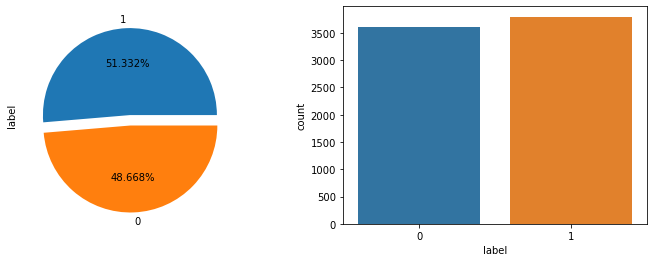

In [5]:
#Plotting Label Column
f, ax = plt.subplots(1, 2, figsize = (12,4))
train_data.label.value_counts().plot.pie(explode = [0,0.12], autopct = '%1.3f%%', ax = ax[0])
sns.countplot('label',data = train_data )
plt.show()

In [6]:
train_data["urlid"].value_counts()

2047    1
5416    1
3371    1
7473    1
1330    1
       ..
6734    1
2644    1
6742    1
4695    1
4098    1
Name: urlid, Length: 7395, dtype: int64

### Note
- All values are unique, can be used as unique identifier 

In [7]:
train_data["is_news"].value_counts()

1    4552
?    2843
Name: is_news, dtype: int64

### Note
- "is_news" has 2843 unknown values remaining are 1s, this column can be dropped

In [8]:
train_data["news_front_page"].value_counts()

0    5853
?    1248
1     294
Name: news_front_page, dtype: int64

### Note
- "news_front_page" has 1248 unknown values, 5853 - 0s, this columns is highly biased, can be dropped

In [9]:
# Dropping unwanted columns

train_data.drop(["is_news", "news_front_page"], axis = 1, inplace = True)
train_data.shape

(7395, 25)

In [10]:
# Checking column
train_data["alchemy_category"].value_counts(), train_data["alchemy_category_score"].value_counts()

(?                     2342
 recreation            1229
 arts_entertainment     941
 business               880
 health                 506
 sports                 380
 culture_politics       343
 computer_internet      296
 science_technology     289
 gaming                  76
 religion                72
 law_crime               31
 unknown                  6
 weather                  4
 Name: alchemy_category, dtype: int64,
 ?            2342
 0.85           82
 0.0784091      40
 0.849999       12
 0.535009       10
              ... 
 0.754663        1
 0.701964        1
 0.61844         1
 0.617462        1
 0.469928        1
 Name: alchemy_category_score, Length: 4806, dtype: int64)

### Note
- It can be seen that unknown category has got no score it can be replaced with 0.

In [11]:
train_data[train_data['alchemy_category'] == 'unknown']

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,html_ratio,image_ratio,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
906,http://9gg.us/haha-123456789/,3633,"{""url"":""9gg haha 123456789"",""title"":"" "",""body""...",unknown,0.400001,4.176471,0.000000,0.000000,0.000000,0.000000,...,0.208118,0.512821,1,83,81,17,1,0.000000,0.121212,0
934,http://www.ivillage.com/better-beginnings/4-j-...,8376,"{""title"":""Better Beginnings iVillage "",""body"":...",unknown,0.400001,2.269231,0.721622,0.370270,0.078378,0.021622,...,0.173837,-1.000000,1,76,1329,370,6,0.127027,0.076923,1
1351,http://nymag.com/search/search.cgi?t=runway&N=...,3512,"{""title"":""New York Fashion Search Barbie new y...",unknown,0.400001,1.705000,0.358423,0.093190,0.000000,0.000000,...,0.193083,9.800000,0,51,1810,279,3,0.358423,0.037037,0
4547,http://www.ascii-wm.net/,5391,"{""title"":""ASCII WM 2006 "",""body"":""documentatio...",unknown,0.400001,2.571429,0.166667,0.000000,0.000000,0.000000,...,0.379116,0.025210,0,13,359,12,0,0.083333,0.191489,0
5491,http://www.etsy.com/shop/simplicityisbliss,4599,"{""title"":""SIB Vintage Simplicity Is Bliss by s...",unknown,0.400001,3.006623,0.476684,0.227979,0.196891,0.196891,...,0.122267,0.179641,1,68,1320,193,3,0.388601,0.127273,0
7015,http://9gg.us/l4d/,4349,"{""url"":""9gg l4d"",""title"":""L4D "",""body"":""random...",unknown,0.400001,2.823529,0.000000,0.000000,0.000000,0.000000,...,0.261131,0.256410,0,72,88,17,0,0.000000,0.117647,1


In [12]:
# Replacing "?" with unknown

train_data["alchemy_category"] = train_data["alchemy_category"].str.replace("?", "unknown")
train_data["alchemy_category"].value_counts()

unknown               2348
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
weather                  4
Name: alchemy_category, dtype: int64

In [13]:
# Replacing "?" with 0.0

train_data["alchemy_category_score"] = train_data["alchemy_category_score"].str.replace("?", "0.0")
train_data["alchemy_category_score"].value_counts()

0.0          2342
0.85           82
0.0784091      40
0.849999       12
0.535009       10
             ... 
0.701964        1
0.61844         1
0.617462        1
0.757544        1
0.469928        1
Name: alchemy_category_score, Length: 4806, dtype: int64

In [14]:
# Converting from object to float
train_data["alchemy_category_score"] = train_data["alchemy_category_score"].astype("float64")

In [15]:
train_data["alchemy_category_score"].describe()

count    7395.000000
mean        0.412258
std         0.331274
min         0.000000
25%         0.000000
50%         0.471444
75%         0.708279
max         0.999426
Name: alchemy_category_score, dtype: float64

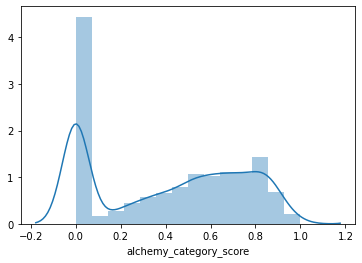

In [16]:
sns.distplot(train_data["alchemy_category_score"])

In [17]:
# Statistical description

train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
urlid,7395.0,5305.704665,3048.384114,1.000000,2688.500000,5304.000000,7946.500000,10566.000000
alchemy_category_score,7395.0,0.412258,0.331274,0.000000,0.000000,0.471444,0.708279,0.999426
avglinksize,7395.0,2.761823,8.619793,0.000000,1.602062,2.088235,2.627451,363.000000
commonlinkratio_1,7395.0,0.468230,0.203133,0.000000,0.340370,0.481481,0.616604,1.000000
commonlinkratio_2,7395.0,0.214080,0.146743,0.000000,0.105263,0.202454,0.300000,1.000000
commonlinkratio_3,7395.0,0.092062,0.095978,0.000000,0.022222,0.068627,0.133333,0.980392
commonlinkratio_4,7395.0,0.049262,0.072629,0.000000,0.000000,0.022222,0.065065,0.980392
compression_ratio,7395.0,2.255103,5.704313,0.000000,0.442616,0.483680,0.578227,21.000000
embed_ratio,7395.0,-0.103750,0.306545,-1.000000,0.000000,0.000000,0.000000,0.250000
framebased,7395.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [18]:
# Checking how many different values are there in each column

for i in train_data.columns:
    print(  "{:35s}{} ".format(i, len(train_data[i].value_counts())) )

url                                7395 
urlid                              7395 
boilerplate                        7394 
alchemy_category                   13 
alchemy_category_score             4806 
avglinksize                        5710 
commonlinkratio_1                  4476 
commonlinkratio_2                  4038 
commonlinkratio_3                  3266 
commonlinkratio_4                  2695 
compression_ratio                  6453 
embed_ratio                        366 
framebased                         1 
frameTagRatio                      5911 
hasDomainLink                      2 
html_ratio                         7376 
image_ratio                        5418 
lengthyLinkDomain                  2 
linkwordscore                      101 
non_markup_alphanum_characters     5301 
numberOfLinks                      702 
numwords_in_url                    23 
parametrizedLinkRatio              3922 
spelling_errors_ratio              4219 
label                           

In [19]:
# Checking columns for value counts

for i in train_data.columns:
    if train_data[i].dtype in ['int64', 'float64']:
        print("Column Name   ", i)
        print((train_data[i].value_counts()))        
        print("No of Unique Values ", len(train_data[i].unique()) )
        print()

Column Name    urlid
2047    1
5416    1
3371    1
7473    1
1330    1
       ..
6734    1
2644    1
6742    1
4695    1
4098    1
Name: urlid, Length: 7395, dtype: int64
No of Unique Values  7395

Column Name    alchemy_category_score
0.000000    2342
0.850000      82
0.078409      40
0.849999      12
0.535009      10
            ... 
0.726488       1
0.296613       1
0.711215       1
0.368722       1
0.652049       1
Name: alchemy_category_score, Length: 4806, dtype: int64
No of Unique Values  4806

Column Name    avglinksize
2.000000      58
0.000000      41
1.000000      37
2.333333      34
2.500000      29
              ..
2.860000       1
2.142132       1
2.393162       1
2.744361       1
119.000000     1
Name: avglinksize, Length: 5710, dtype: int64
No of Unique Values  5710

Column Name    commonlinkratio_1
0.000000    223
0.500000     66
0.333333     61
0.297297     32
0.400000     30
           ... 
0.632242      1
0.514851      1
0.520599      1
0.576531      1
0.306180     

### Notes from columns
- framebased - it has 7395 - 0s - it can be dropped
- hasDomainLink - it has 7238- 1s and 157 - 0s  it is highly biased it can be dropped


In [20]:
# Dropping Unwanted columns
train_data.drop(["framebased", "hasDomainLink" ], axis = 1, inplace = True)
train_data.shape

(7395, 23)

In [21]:
train_data.head(3).T

,0,1,2
url,http://www.bloomberg.com/news/2010-12-23/ibm-p...,http://www.popsci.com/technology/article/2012-...,http://www.menshealth.com/health/flu-fighting-...
urlid,4042,8471,1164
boilerplate,"{""title"":""IBM Sees Holographic Calls Air Breat...","{""title"":""The Fully Electronic Futuristic Star...","{""title"":""Fruits that Fight the Flu fruits tha..."
alchemy_category,business,recreation,health
alchemy_category_score,0.789131,0.574147,0.996526
avglinksize,2.05556,3.67797,2.38288
commonlinkratio_1,0.676471,0.508021,0.562016
commonlinkratio_2,0.205882,0.28877,0.321705
commonlinkratio_3,0.0470588,0.213904,0.120155
commonlinkratio_4,0.0235294,0.144385,0.0426357


In [22]:
# Checking boilerplate column
train_data['boilerplate'][0]

'{"title":"IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries","body":"A sign stands outside the International Business Machines Corp IBM Almaden Research Center campus in San Jose California Photographer Tony Avelar Bloomberg Buildings stand at the International Business Machines Corp IBM Almaden Research Center campus in the Santa Teresa Hills of San Jose California Photographer Tony Avelar Bloomberg By 2015 your mobile phone will project a 3 D image of anyone who calls and your laptop will be powered by kinetic energy At least that s what International Business Machines Corp sees in its crystal ball The predictions are part of an annual tradition for the Armonk New York based company which surveys its 3 000 researchers to find five ideas expected to take root in the next five years IBM the world s largest provider of computer services looks to Silicon Valley for input gleaning many ideas from its Almaden research center in San Jose

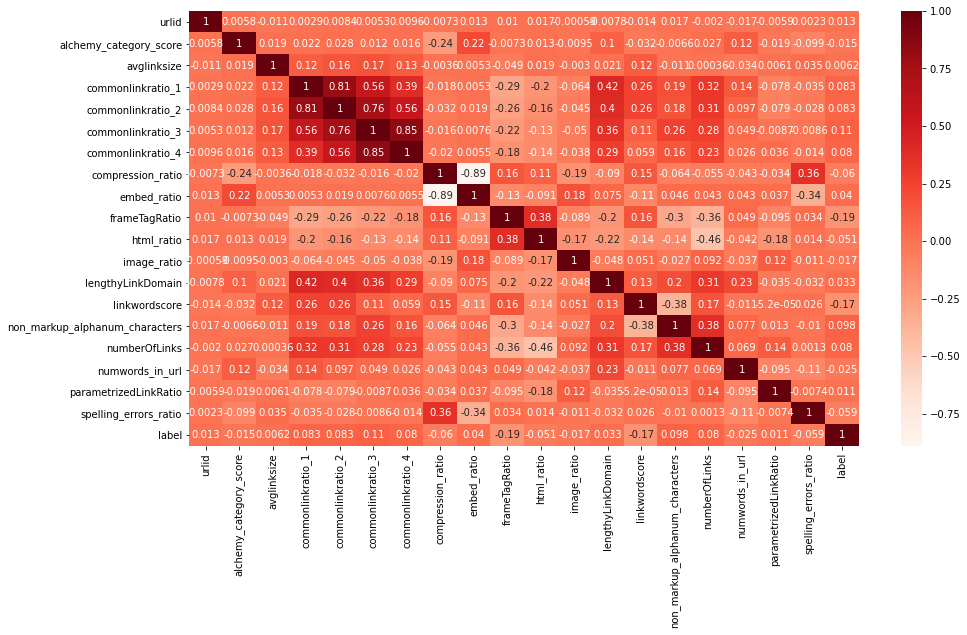

In [23]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'Reds')

###  Note
- from heat map it can be seen that 'commonlinkratio_1' is highly correlated to  'commonlinkratio_2' 0.81
- from heat map it can be seen that 'commonlinkratio_3' is highly correlated to  'commonlinkratio_4' 0.85
- from heat map it can be seen that 'embed_ratio' is highly correlated to  'compression_ratio'       -0.89   

In [24]:
# Dropping highly correlated columns
train_data.drop(['commonlinkratio_2', 'commonlinkratio_4', 'embed_ratio'], axis = 1, inplace = True)
train_data.shape

(7395, 20)

In [25]:
import json
res = json.loads(train_data['boilerplate'][0])
print(res.keys())

dict_keys(['title', 'body', 'url'])


In [26]:
print(res.values())

dict_values(['IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries', 'A sign stands outside the International Business Machines Corp IBM Almaden Research Center campus in San Jose California Photographer Tony Avelar Bloomberg Buildings stand at the International Business Machines Corp IBM Almaden Research Center campus in the Santa Teresa Hills of San Jose California Photographer Tony Avelar Bloomberg By 2015 your mobile phone will project a 3 D image of anyone who calls and your laptop will be powered by kinetic energy At least that s what International Business Machines Corp sees in its crystal ball The predictions are part of an annual tradition for the Armonk New York based company which surveys its 3 000 researchers to find five ideas expected to take root in the next five years IBM the world s largest provider of computer services looks to Silicon Valley for input gleaning many ideas from its Almaden research center in San Jose Ca

### Note
- url is available in in boilerplate column so url column can be dropped
- title , body and url can be combined together to form a single text


In [27]:
# Checking Column boiler plate for errors
new = []
for i, j in enumerate(train_data['boilerplate']):
    try:
        x = json.loads(j)
        x = x.values()
        x = " ".join(x)
    except Exception as err:
        # These are the rows that gives errors while converting to text
        new.append(i)
        
print(new)

[17, 73, 239, 383, 396, 402, 476, 521, 578, 910, 1050, 1120, 1222, 1254, 1317, 1448, 1642, 1649, 1694, 1762, 2111, 2267, 2315, 2320, 2975, 3026, 3473, 3552, 3753, 3867, 3878, 3909, 4055, 4125, 4133, 4142, 4285, 4350, 4479, 4516, 4543, 4563, 4632, 4983, 5273, 5358, 5399, 5511, 5552, 5804, 5811, 5950, 6027, 6031, 6095, 6112, 6138, 6155, 6208, 6366, 6502, 6574, 6710, 6768, 6783, 6941, 6965, 7029]


In [28]:
# Checking Column boiler plate for errors

for i, j in enumerate(train_data['boilerplate']):
    try:
        x = json.loads(j)
        x = x['title']
         
    except Exception as err:
        # These are the rows that gives errors does not have title
        print(i)

3147


In [29]:
# Checking Column boiler plate for errors
new = []
for i, j in enumerate(train_data['boilerplate']):
    try:
        x = json.loads(j)
        x = x['body']
         
    except Exception as err:
        # These are the rows that gives errors does not have body
        new.append(i)
        
print(new)

[]


In [30]:
# All rows have body in them

In [31]:
# Checking Column boiler plate for errors
new = []
for i, j in enumerate(train_data['boilerplate']):
    try:
        x = json.loads(j)
        x = x['url']
         
    except Exception as err:
        # These are the rows that gives errors does not have url
        new.append(i)
        
print(new)

[533, 539, 570, 589, 633, 712, 800, 808, 893, 912, 961, 1007, 1233, 1248, 1474, 1506, 1624, 1709, 2145, 2236, 2255, 2256, 2379, 2692, 2832, 2897, 3084, 3091, 3112, 3147, 3273, 3294, 3360, 3436, 3570, 3710, 3750, 3814, 3887, 3893, 4012, 4178, 4331, 4648, 4948, 4998, 5119, 5177, 5237, 5248, 5274, 5317, 5431, 5743, 5843, 5963, 6135, 6314, 6457, 7289]


In [32]:
train_data['boilerplate'][6457]

'{"body":"Get the full story! Visit http:\\/\\/foodwishes.com to get the ingredients, and watch over 300 free video recipes. Leave me a comment there. If you have questions, ask on the website. Thanks!! Granola Recipe diet health food cooking chef john foodwishes Howto & Style","title":"Granola Recipe - How to Make Granola"}'

In [33]:
train_data['url'][6457]

'http://www.youtube.com/watch?v=zDV17k0VYYQ'

In [34]:
train_data['boilerplate'][6456]

'{"title":"LOOKBOOK nu ","body":" browse worn by real people. ","url":"sweden lookbook nu hot 3"}'

In [35]:
train_data['url'][6456]

'http://sweden.lookbook.nu/hot/3'

### Note
- URL is missing in some rows it can be obtained from url column after some modification

In [36]:
# Selecting rows not having url
url_list = []

for i, j in enumerate(train_data['boilerplate']):
    try:
        x = json.loads(j)
        x = x['url']
        
    except Exception as err:
        # These are the rows that gives errors does not have url
        url_list.append(i)
print(url_list)

[533, 539, 570, 589, 633, 712, 800, 808, 893, 912, 961, 1007, 1233, 1248, 1474, 1506, 1624, 1709, 2145, 2236, 2255, 2256, 2379, 2692, 2832, 2897, 3084, 3091, 3112, 3147, 3273, 3294, 3360, 3436, 3570, 3710, 3750, 3814, 3887, 3893, 4012, 4178, 4331, 4648, 4948, 4998, 5119, 5177, 5237, 5248, 5274, 5317, 5431, 5743, 5843, 5963, 6135, 6314, 6457, 7289]


In [37]:
# Checking actual url column
[train_data['url'][i] for i in url_list]

['http://www.funnyordie.com/slideshows/d2c16682d5/the-best-pictures-front-the-london-olympics-so-far',
 'http://www.youtube.com/watch?v=FHBhyqowSEc',
 'http://www.youtube.com/watch?v=MeWHmehAH28',
 'http://www.youtube.com/watch?v=-_HjvjB4G5s',
 'http://www.youtube.com/watch?v=l2YgzCuKnv4',
 'http://www.youtube.com/watch?v=x4StzNTpNls',
 'http://www.youtube.com/watch?v=g6I8Fc3kw60',
 'http://www.youtube.com/watch?v=xPR0xFgCAZY',
 'http://www.youtube.com/watch?v=SN3j0U8WqiA',
 'http://www.youtube.com/watch?v=v0l7_yvclRc',
 'http://www.youtube.com/watch?v=eKtsMfmQ_0s',
 'http://www.youtube.com/watch?v=i79pveaC-xM',
 'http://www.youtube.com/watch?v=EljaGpogiws',
 'http://www.youtube.com/watch?v=MjuiazBz5Eo',
 'http://www.youtube.com/watch?v=IYkdPxRwPVA',
 'http://www.youtube.com/watch?v=lO5bZnm-Z9g',
 'http://www.youtube.com/watch?v=cVKquLkK-b8',
 'http://www.youtube.com/watch?v=GbH5gAh0qPQ',
 'http://www.youtube.com/watch?v=BlTCkNkfmRY',
 'http://www.youtube.com/watch?v=tVfYnm81ywo',
 'ht

In [38]:
import re
def clean_url(x):
    x = re.sub(r'\?[\S]*', '', x)   # Removes anything after ?
    x = re.sub(r'[\w]+[0-9]+', '', x) # Removes alphanumeric characters
    x = x.replace(r'http://', '')     # Removes http characters 
    x = x.replace(r'.com', ' ')
    x = x.replace(r'www.', ' ')    
    x = x.replace(r'.', ' ')
    x = x.replace(r'-', ' ')
    x = x.replace(r'/', ' ')    
    
    return x

In [39]:
clean_url('http://sweden.lookbook.nu/hot/3')

'sweden lookbook nu hot 3'

In [40]:
clean_url('http://www.funnyordie.com/slideshows/d2c16682d5/the-best-pictures-front-the-london-olympics-so-far')

' funnyordie  slideshows  the best pictures front the london olympics so far'

In [41]:
clean_url('http://www.youtube.com/watch?v=FHBhyqowSEc')

' youtube  watch'

In [42]:
cleaned_url_list = [clean_url(train_data['url'][i]) for i in url_list]
cleaned_url_list

[' funnyordie  slideshows  the best pictures front the london olympics so far',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' freep  article     features',
 ' youtube  watch',
 ' freep  ',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  watch',
 ' youtube  wa

In [43]:
train_data['boilerplate'][17]

'{"title":null,"body":"The annual Chap Olympiad described as a celebration of eccentricity and athletic ineptitude with the emphasis on panache and style over sporting prowess took place in Bloomsbury Square London at the weekend and featured events such as cucumber sandwich discus and umbrella jousting the annual chap olympiad in bloomsbury square, london, featured events such as butler racing discus and umbrella jousting the annual chap olympiad in bloomsbury square, london, featured events such as butler racing discus and umbrella jousting fashion,culture,life and style,festivals,london,fashion","url":"guardian co uk fashion gallery 2012 jul 08 gentlemen compete chap olympiad in pictures"}'

In [44]:
train_data['boilerplate'][73]

'{"title":"Clean and Disinfect with Tap Water The Activeion Hom clean and disinfect with tap water: the activeion hom","body":null,"url":"naturalpapa review clean disinfect tap water activeion hom"}'

In [45]:
train_data['boilerplate'][239]

'{"title":"Pumpkin Contest Winner Fireside Pumpkin Soup ","body":null,"url":"betterrecipes blogs daily dish 2011 11 02 pumpkin contest winner"}'

### Note
- Some places title is null, body is null it has to be replaced with " "(space), in some places "title": and "url": is missing

In [46]:
# Example
train_data['boilerplate'][533]

'{"body":" Heads up: Some of these get pretty raunchy. There\'s a reason it\'s called the XXX Summer Olympic Games.  heads up: some of these get pretty raunchy. there\'s a reason it\'s called the xxx summer olympic games. london olympics, funny olympics pictures, divers, diver faces, olympic divers, olympic diver faces, london olympics pictures, summer olympics heads up: some of these get pretty raunchy. there\'s a reason it\'s called the xxx summer olympic games. ","title":"The Best Pictures front the London Olympics So Far from Look What I Found the best pictures front the london olympics (so far)"}'

In [47]:
# Adding url in missing places

for i, j in zip(url_list, cleaned_url_list):
    train_data['boilerplate'][i] = train_data['boilerplate'][i]  + j
    
train_data['boilerplate'][533]   

C:\My_Programs\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


'{"body":" Heads up: Some of these get pretty raunchy. There\'s a reason it\'s called the XXX Summer Olympic Games.  heads up: some of these get pretty raunchy. there\'s a reason it\'s called the xxx summer olympic games. london olympics, funny olympics pictures, divers, diver faces, olympic divers, olympic diver faces, london olympics pictures, summer olympics heads up: some of these get pretty raunchy. there\'s a reason it\'s called the xxx summer olympic games. ","title":"The Best Pictures front the London Olympics So Far from Look What I Found the best pictures front the london olympics (so far)"} funnyordie  slideshows  the best pictures front the london olympics so far'

### Cleaning Column - Boilerplate

In [48]:
def clean_boilerplate_1(x):
    x = x.replace(r'"title":', " ")  # removes title  
    x = x.replace(r'"body":', " ")   # removes body
    x = x.replace(r'"url":', " ")    # removes url
    x = x.replace(r'null', " ")      # removes null
    return x

In [49]:
# Sample check
clean_boilerplate_1('{"title":"Pumpkin Contest Winner Fireside Pumpkin Soup ","body":null,"url":"betterrecipes blogs daily dish 2011 11 02 pumpkin contest winner"}')

'{ "Pumpkin Contest Winner Fireside Pumpkin Soup ",  , "betterrecipes blogs daily dish 2011 11 02 pumpkin contest winner"}'

In [50]:
train_data['boilerplate_text'] = train_data['boilerplate'].apply(clean_boilerplate_1)
train_data.head(3).T

,0,1,2
url,http://www.bloomberg.com/news/2010-12-23/ibm-p...,http://www.popsci.com/technology/article/2012-...,http://www.menshealth.com/health/flu-fighting-...
urlid,4042,8471,1164
boilerplate,"{""title"":""IBM Sees Holographic Calls Air Breat...","{""title"":""The Fully Electronic Futuristic Star...","{""title"":""Fruits that Fight the Flu fruits tha..."
alchemy_category,business,recreation,health
alchemy_category_score,0.789131,0.574147,0.996526
avglinksize,2.05556,3.67797,2.38288
commonlinkratio_1,0.676471,0.508021,0.562016
commonlinkratio_3,0.0470588,0.213904,0.120155
compression_ratio,0.443783,0.468649,0.525448
frameTagRatio,0.0907738,0.0987074,0.0724479


In [51]:
# Dropping boilerplate and url column
train_data.drop(['url', 'boilerplate'], axis = 1, inplace = True)
train_data.shape

(7395, 19)

## Text Preprocessing

In [52]:
# Sample text from data which needs to be cleaned
lis = [ 103, 241, 322, 353, 814, 524, 855]
for i in lis:
    print(train_data['boilerplate_text'][i])
    print()

{ "Common Ingredient Substitutions The Healthified Mom common ingredient substitutions", "Ingredient Amount Substitution Allspice 1 tsp 1 2 tsp cinnamon plus 1 4 tsp ginger plus 1 4 tsp cloves Baking mix 1 c 1 c pancake mix Baking powder 1 tsp 1 4 tsp baking soda plus 1 2 tsp cream of tartar Beer 1 c 1 c chicken broth Bread crumbs 1 c 1 c cracker crumbs Broth chicken or beef 1 c 1 bouillon cube dissolved in 1 c boiling water Butter salted 1 c 1 c margarine OR 1 c shortening plus 1 2 tsp salt OR 7 8 c vegetable oil plus 1 2 tsp salt OR 7 8 c lard plus 1 2 tsp salt Butter unsalted 1 c 1 c shortening OR 7 8 c vegetable oil OR 7 8 c lard Buttermilk 1 c 1 c yogurt OR 1 T lemon juice or vinegar plus enough milk to make 1 c Chervil 1 T 1 T parsley Chocolate semisweet 1 oz 1 1 oz square of unsweetened chocolate plus 4 tsp sugar OR 1 oz semisweet chocolate chips plus 1 tsp shortening Chocolate unsweetened 1 oz 3 T unsweetened cocoa plus 1 T shortening or vegetable oil Cocoa 1 4 c 1 1 oz square 

In [53]:
import string
punc = list(string.punctuation)
print(punc)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [54]:
# Sample Unicode escape data

str.encode('\u041a\u0430\u043a \u0434\u0430 \u0434\u0435\u043a\u043e\u0440\u0438\u0440\u0430\u043c\u0435 \u0431\u0430\u043b\u043a\u043e\u043d\u0430 \u0441\u0438 \u0432 \u041e\u0440\u0438\u0435\u043d\u0442\u0430\u043b\u0441\u043a\u0438 \u0441\u0442\u0438\u043b')

b'\xd0\x9a\xd0\xb0\xd0\xba \xd0\xb4\xd0\xb0 \xd0\xb4\xd0\xb5\xd0\xba\xd0\xbe\xd1\x80\xd0\xb8\xd1\x80\xd0\xb0\xd0\xbc\xd0\xb5 \xd0\xb1\xd0\xb0\xd0\xbb\xd0\xba\xd0\xbe\xd0\xbd\xd0\xb0 \xd1\x81\xd0\xb8 \xd0\xb2 \xd0\x9e\xd1\x80\xd0\xb8\xd0\xb5\xd0\xbd\xd1\x82\xd0\xb0\xd0\xbb\xd1\x81\xd0\xba\xd0\xb8 \xd1\x81\xd1\x82\xd0\xb8\xd0\xbb'

In [55]:
b'\xd0\x9a\xd0\xb0\xd0\xba \xd0\xb4\xd0\xb0 \xd0\xb4\xd0\xb5\xd0\xba\xd0\xbe\xd1\x80\xd0\xb8\xd1\
\x80\xd0\xb0\xd0\xbc\xd0\xb5 \xd0\xb1\xd0\xb0\xd0\xbb\xd0\xba\xd0\xbe\xd0\xbd\xd0\xb0\
\xd1\x81\xd0\xb8 \xd0\xb2 \xd0\x9e\xd1\x80\xd0\xb8\xd0\xb5\xd0\xbd\xd1\x82\xd0\xb0\xd0\xbb\
\xd1\x81\xd0\xba\xd0\xb8 \xd1\x81\xd1\x82\xd0\xb8\xd0\xbb'.decode("utf-8")

'Как да декорираме балконаси в Ориенталски стил'

### Note 
- It is some other language

#### Repeated Character words example

In [56]:
s = """position margin  ffffff hidden em li inline align tabs a active align background cc  px font arial weight letter px size px decoration color position padding px px px px px px px px top px cc  bottom px cc  a active align background cc  px font arial weight letter px size px decoration color position padding px px px px px px px px top px cc  bottom px cc  a activelast align background cc  px font arial weight letter px size px decoration color position padding px px px px px px px px top px cc  bottom px cc  a align background height px family font normal size px spacing px decoration color  relative px px px px px px px px top px ffffff bottom px ffffff a"""
print(s)

position margin  ffffff hidden em li inline align tabs a active align background cc  px font arial weight letter px size px decoration color position padding px px px px px px px px top px cc  bottom px cc  a active align background cc  px font arial weight letter px size px decoration color position padding px px px px px px px px top px cc  bottom px cc  a activelast align background cc  px font arial weight letter px size px decoration color position padding px px px px px px px px top px cc  bottom px cc  a align background height px family font normal size px spacing px decoration color  relative px px px px px px px px top px ffffff bottom px ffffff a


In [57]:
# Removing repeated character words ffffff

re.sub(r'(.)\1{3,}', r'\1', s)

'position margin  f hidden em li inline align tabs a active align background cc  px font arial weight letter px size px decoration color position padding px px px px px px px px top px cc  bottom px cc  a active align background cc  px font arial weight letter px size px decoration color position padding px px px px px px px px top px cc  bottom px cc  a activelast align background cc  px font arial weight letter px size px decoration color position padding px px px px px px px px top px cc  bottom px cc  a align background height px family font normal size px spacing px decoration color  relative px px px px px px px px top px f bottom px f a'

#### Remove_repeated_words

In [58]:
# Function to remove repeated words eg hello hello hello hello px px px px px px 

def remove_repeated_words(text):
    mylis = text.split()
    ulist = ['']    
     
    for x in mylis:
        a = ulist[-1]
        if x != a:
            ulist.append(x)
    return " ".join(ulist)

In [59]:
# Example
a="uba finland france iceland japan malaysia mexico the netherlands amsterdam new zealand senegal sweden south\
korea taiwan u k vietnam browse the archives by date march april march march march march march march february \
march february february february february february february january february january january january january \
january january january january december january december december december december december december november \
december november november november november november november october november october october october october \
october october october october september october september september september september september september \
august september august august august august august august august august july july july july j"
remove_repeated_words(a)

' uba finland france iceland japan malaysia mexico the netherlands amsterdam new zealand senegal sweden southkorea taiwan u k vietnam browse the archives by date march april march february march february january february january december january december november december november october november october september october september august september august july j'

#### Remove accented words

In [60]:
# Function to remove accented words

import unicodedata

def remove_accented(text):
    text = unicodedata.normalize("NFKD", text ).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [61]:
sample = 'remove accented characters from text, e.g. café'
remove_accented(sample)

'remove accented characters from text, e.g. cafe'

#### Stop words removal

In [62]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [63]:
mystop= list(set(stop + list(string.ascii_letters)))
mystop.sort()
print(mystop)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'b', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'c', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'e', 'each', 'f', 'few', 'for', 'from', 'further', 'g', 'h', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'j', 'just', 'k', 'l', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'n', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only'

In [64]:
# Function to remove stopwords

def remove_stop_words(text):
    mylis = [word  for word in text.split() if word not in mystop]       # Removes stop words
    text = [word  for word in mylis if len(word) > 3 ]                   # Removes words having length <= 3
    text = ' '.join(text)
    return text

#### Lemmatization

In [65]:
from nltk.stem import WordNetLemmatizer

def lemmatize_words(text):
    lemmatizer = WordNetLemmatizer()
    mylis = [lemmatizer.lemmatize(word) for word in text.split()]
    text = " ".join(mylis)
    return text

In [66]:
tex = """common ingredient substitutions healthified common ingredient substitutions ingredient amount substitution allspice cinnamon plus ginger plus cloves baking pancake baking powder baking soda plus cream tartar beer chicken broth bread crumbs cracker crumbs broth chicken beef bouillon cube dissolved boiling water butter salted margarine shortening plus salt vegetable plus salt lard plus salt butter unsalted shortening vegetable lard buttermilk yogurt lemon juice vinegar plus enough milk make chervil parsley chocolate semisweet square unsweetened chocolate plus sugar semisweet chocolate chips plus shortening chocolate unsweetened unsweetened cocoa plus shortening vegetable cocoa square unsweetened chocolate condensed cream mushroom soup condensed cream celery cream chicken golden mushroom soup corn syrup white sugar plus water honey cottage cheese ricotta cheese cracker crumbs bread crumbs"""
lemmatize_words(tex)

'common ingredient substitution healthified common ingredient substitution ingredient amount substitution allspice cinnamon plus ginger plus clove baking pancake baking powder baking soda plus cream tartar beer chicken broth bread crumb cracker crumb broth chicken beef bouillon cube dissolved boiling water butter salted margarine shortening plus salt vegetable plus salt lard plus salt butter unsalted shortening vegetable lard buttermilk yogurt lemon juice vinegar plus enough milk make chervil parsley chocolate semisweet square unsweetened chocolate plus sugar semisweet chocolate chip plus shortening chocolate unsweetened unsweetened cocoa plus shortening vegetable cocoa square unsweetened chocolate condensed cream mushroom soup condensed cream celery cream chicken golden mushroom soup corn syrup white sugar plus water honey cottage cheese ricotta cheese cracker crumb bread crumb'

In [67]:
# Function to clean String

def clean_boilerplate_2(text):
    text = text.lower()                                         # lowers case all the text
    text = re.sub(r"http:\/\/|www\.?|\.com|http:?", ' ', text)  # Substitutes http, www, com etc with " "
    text = re.sub(r"\/", ' ', text)                    
    text = re.sub(r"\\n", ' ', text)                            # Substitutes newline with space " "
    text = re.sub(r"\\u\S*", ' ', text)                         # Substitutes unicode escape strings with " " 
    text = re.sub("\d", ' ', text)                              # Substitutes all numbers with space " "
    mylist = [' ' if alpha in list(string.punctuation) else alpha for alpha in text ] # Removes all punctuation
    text = ''.join(mylist)                                   
    text = re.sub(r'(.)\1{3,}', r'\1', text)      # Any character that is repeating more than 3 times will be replaced
    text = text.replace('  ', ' ')                # Removes all excess space
    text = text.replace('  ', ' ')                # Removes all excess space
    
    text = remove_repeated_words(text)            # Removes repeated words
    text = remove_accented(text)                  # Removes accented characters
    text = remove_stop_words(text)                # Removes all stop words and small words(3 letter)
    text = lemmatize_words(text)
    text = text.replace('  ', '')                 # Removes extra space
    text = text.strip()                           # Strips excess space from left and right of string
    return text

In [68]:
lis = [ 103, 241, 322, 353, 814, 524, 855]
for i in lis:
    print(clean_boilerplate_2(train_data['boilerplate_text'][i]))
    print()

common ingredient substitution healthified common ingredient substitution ingredient amount substitution allspice cinnamon plus ginger plus clove baking pancake baking powder baking soda plus cream tartar beer chicken broth bread crumb cracker crumb broth chicken beef bouillon cube dissolved boiling water butter salted margarine shortening plus salt vegetable plus salt lard plus salt butter unsalted shortening vegetable lard buttermilk yogurt lemon juice vinegar plus enough milk make chervil parsley chocolate semisweet square unsweetened chocolate plus sugar semisweet chocolate chip plus shortening chocolate unsweetened unsweetened cocoa plus shortening vegetable cocoa square unsweetened chocolate condensed cream mushroom soup condensed cream celery cream chicken golden mushroom soup corn syrup white sugar plus water honey cottage cheese ricotta cheese cracker crumb bread crumb cream half half milk plus butter cream heavy evaporated milk milk plus butter cream light evaporated milk mil

In [69]:
train_data['boilerplate_text'] = train_data['boilerplate_text'].apply(clean_boilerplate_2)


In [70]:
train_data.head(3).T

,0,1,2
urlid,4042,8471,1164
alchemy_category,business,recreation,health
alchemy_category_score,0.789131,0.574147,0.996526
avglinksize,2.05556,3.67797,2.38288
commonlinkratio_1,0.676471,0.508021,0.562016
commonlinkratio_3,0.0470588,0.213904,0.120155
compression_ratio,0.443783,0.468649,0.525448
frameTagRatio,0.0907738,0.0987074,0.0724479
html_ratio,0.245831,0.20349,0.226402
image_ratio,0.00388349,0.0886525,0.120536


## Text Analysis

In [71]:
from collections import Counter

cnt = Counter([word for i in train_data['boilerplate_text'].values for word in i.split() ])
len(cnt)

69563

In [72]:
# Most commonly occurring 20 words

cnt.most_common(20)

[('recipe', 12024),
 ('make', 9104),
 ('food', 7862),
 ('like', 7800),
 ('time', 7678),
 ('minute', 6027),
 ('chocolate', 5602),
 ('sugar', 5197),
 ('butter', 4982),
 ('also', 4691),
 ('year', 4665),
 ('cream', 4040),
 ('cheese', 3887),
 ('good', 3880),
 ('cake', 3875),
 ('well', 3838),
 ('water', 3834),
 ('best', 3755),
 ('would', 3743),
 ('people', 3732)]

## Test Data Cleaning

In [73]:
# Reading the test file

test_data = pd.read_csv('test.tsv', sep= '\t')
test_data.head(3).T

,0,1,2
url,http://www.lynnskitchenadventures.com/2009/04/...,http://lolpics.se/18552-stun-grenade-ar,http://www.xcelerationfitness.com/treadmills.html
urlid,5865,782,6962
boilerplate,"{""title"":""Homemade Enchilada Sauce Lynn s Kitc...","{""title"":""lolpics Stun grenade ar "",""body"":"" f...","{""title"":""Treadmills "",""body"":"" treadmills, st..."
alchemy_category,recreation,culture_politics,?
alchemy_category_score,0.443906,0.135844,?
avglinksize,2.55814,3.77143,2.26957
commonlinkratio_1,0.389706,0.461538,0.495726
commonlinkratio_2,0.257353,0.205128,0.384615
commonlinkratio_3,0.0441176,0.0512821,0.17094
commonlinkratio_4,0.0220588,0,0.17094


In [74]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3171 entries, 0 to 3170
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             3171 non-null   object 
 1   urlid                           3171 non-null   int64  
 2   boilerplate                     3171 non-null   object 
 3   alchemy_category                3171 non-null   object 
 4   alchemy_category_score          3171 non-null   object 
 5   avglinksize                     3171 non-null   float64
 6   commonlinkratio_1               3171 non-null   float64
 7   commonlinkratio_2               3171 non-null   float64
 8   commonlinkratio_3               3171 non-null   float64
 9   commonlinkratio_4               3171 non-null   float64
 10  compression_ratio               3171 non-null   float64
 11  embed_ratio                     3171 non-null   float64
 12  framebased                      31

In [75]:
test_data.drop(["is_news", "news_front_page", "framebased", "hasDomainLink", \
                'commonlinkratio_2', 'commonlinkratio_4', 'embed_ratio'], axis = 1, inplace = True)
test_data.shape

(3171, 19)

In [76]:
test_data["alchemy_category"].value_counts()

?                     1046
recreation             472
arts_entertainment     422
business               355
health                 200
sports                 186
culture_politics       156
computer_internet      134
science_technology     120
religion                35
gaming                  34
law_crime               11
Name: alchemy_category, dtype: int64

In [77]:
# Replacing "?" with unknown

test_data["alchemy_category"] = test_data["alchemy_category"].str.replace("?", "unknown")
test_data["alchemy_category"].value_counts()

unknown               1046
recreation             472
arts_entertainment     422
business               355
health                 200
sports                 186
culture_politics       156
computer_internet      134
science_technology     120
religion                35
gaming                  34
law_crime               11
Name: alchemy_category, dtype: int64

In [78]:
# Replacing "?" with 0.0

test_data["alchemy_category_score"] = test_data["alchemy_category_score"].str.replace("?", "0.0")
test_data["alchemy_category_score"].value_counts()

0.0          1046
0.85           33
0.0784091      22
0.849996        4
0.9             4
             ... 
0.607404        1
0.53579         1
0.847346        1
0.535086        1
0.808079        1
Name: alchemy_category_score, Length: 2036, dtype: int64

In [79]:
# Converting from object to float
test_data["alchemy_category_score"] = test_data["alchemy_category_score"].astype("float64")

In [80]:
# Statistical description

test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
urlid,3171.0,5231.717124,3054.569996,3.000000,2536.500000,5229.000000,7865.500000,10564.000000
alchemy_category_score,3171.0,0.398609,0.332112,0.000000,0.000000,0.440317,0.693036,0.999812
avglinksize,3171.0,2.968182,19.536725,0.000000,1.610350,2.065476,2.576541,1062.000000
commonlinkratio_1,3171.0,0.467111,0.199111,0.000000,0.339454,0.478261,0.611270,1.000000
commonlinkratio_3,3171.0,0.089960,0.094182,0.000000,0.019608,0.064935,0.131962,0.734932
compression_ratio,3171.0,2.375620,5.879138,0.000000,0.441972,0.481728,0.586843,21.000000
frameTagRatio,3171.0,0.058089,0.043265,0.000000,0.028866,0.048302,0.074899,0.375000
html_ratio,3171.0,0.235723,0.054393,0.046925,0.201739,0.233212,0.263529,0.678877
image_ratio,3171.0,0.257211,1.323941,-1.000000,0.023005,0.076087,0.222222,29.000000
lengthyLinkDomain,3171.0,0.640492,0.479932,0.000000,0.000000,1.000000,1.000000,1.000000


In [81]:
# Selecting rows not having url
test_url_list = []

for i, j in enumerate(test_data['boilerplate']):
    try:
        x = json.loads(j)
        x = x['url']
        
    except Exception as err:
        # These are the rows that gives errors does not have url
        test_url_list.append(i)
print(test_url_list)

[61, 391, 638, 685, 825, 899, 991, 1164, 1267, 1272, 1325, 1407, 1418, 1500, 1743, 1756, 2053, 2081, 2135, 2170, 2249, 2269, 2341, 2364, 2551, 2562, 2671, 2758, 2815, 2974]


In [82]:
test_cleaned_url_list = [clean_url(test_data['url'][i]) for i in test_url_list]
print(test_cleaned_url_list)

[' youtube  watch', ' youtube  watch', ' youtube  watch', ' youtube  watch', ' youtube  watch', ' youtube  watch', ' youtube  watch', ' youtube  watch', ' youtube  watch', ' youtube  watch', ' youtube  watch', ' youtube  watch', ' youtube  watch', ' youtube  watch', ' youtube  watch', ' youtube  watch', ' youtube  watch', ' youtube  watch', ' youtube  watch', ' youtube  watch', ' youtube  watch', ' youtube  watch', ' youtube  watch', ' youtube  watch', ' youtube  watch', ' youtube  watch', ' youtube  watch', ' youtube  watch', ' youtube  watch', ' youtube  watch']


In [83]:
# Adding url in missing places

for i, j in zip(test_url_list, test_cleaned_url_list):
    test_data['boilerplate'][i] = test_data['boilerplate'][i]  + j
    
test_data['boilerplate'][61]

C:\My_Programs\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


'{"body":"Get the full story! Visit http:\\/\\/foodwishes.com to get the ingredients, and watch over 200 free video recipes. Leave me a comment there. If you have questions, ask on the website. Thanks!! Irish Lamb Stew St. Patricks Meal cook recipe cooking food foodwishes sexy Howto & Style","title":"Irish Stew - Irish Lamb Stew"} youtube  watch'

In [84]:
# Text processing boilerplate column

test_data['boilerplate_text'] = test_data['boilerplate'].apply(clean_boilerplate_1)
test_data.head(3).T

,0,1,2
url,http://www.lynnskitchenadventures.com/2009/04/...,http://lolpics.se/18552-stun-grenade-ar,http://www.xcelerationfitness.com/treadmills.html
urlid,5865,782,6962
boilerplate,"{""title"":""Homemade Enchilada Sauce Lynn s Kitc...","{""title"":""lolpics Stun grenade ar "",""body"":"" f...","{""title"":""Treadmills "",""body"":"" treadmills, st..."
alchemy_category,recreation,culture_politics,unknown
alchemy_category_score,0.443906,0.135844,0
avglinksize,2.55814,3.77143,2.26957
commonlinkratio_1,0.389706,0.461538,0.495726
commonlinkratio_3,0.0441176,0.0512821,0.17094
compression_ratio,0.489572,0.782051,1.25
frameTagRatio,0.0671429,0.0428571,0.0588235


In [85]:
# Dropping boilerplate and url column
test_data.drop(['url', 'boilerplate'], axis = 1, inplace = True)
test_data.shape

(3171, 18)

In [86]:
test_data['boilerplate_text'] = test_data['boilerplate_text'].apply(clean_boilerplate_2)

In [87]:
test_data.head(3).T

,0,1,2
urlid,5865,782,6962
alchemy_category,recreation,culture_politics,unknown
alchemy_category_score,0.443906,0.135844,0
avglinksize,2.55814,3.77143,2.26957
commonlinkratio_1,0.389706,0.461538,0.495726
commonlinkratio_3,0.0441176,0.0512821,0.17094
compression_ratio,0.489572,0.782051,1.25
frameTagRatio,0.0671429,0.0428571,0.0588235
html_ratio,0.230285,0.365962,0.161901
image_ratio,0.199438,0.08,10


### Dummy Variables for alchemy column - Train data

In [88]:
# Dummies for weekday
train_data = pd.get_dummies(train_data, prefix = 'category', columns = ['alchemy_category'] )
train_data.head()

,urlid,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_3,compression_ratio,frameTagRatio,html_ratio,image_ratio,lengthyLinkDomain,...,category_culture_politics,category_gaming,category_health,category_law_crime,category_recreation,category_religion,category_science_technology,category_sports,category_unknown,category_weather
0,4042,0.789131,2.055556,0.676471,0.047059,0.443783,0.090774,0.245831,0.003883,1,...,0,0,0,0,0,0,0,0,0,0
1,8471,0.574147,3.677966,0.508021,0.213904,0.468649,0.098707,0.203490,0.088652,1,...,0,0,0,0,1,0,0,0,0,0
2,1164,0.996526,2.382883,0.562016,0.120155,0.525448,0.072448,0.226402,0.120536,1,...,0,0,1,0,0,0,0,0,0,0
3,6684,0.801248,1.543103,0.400000,0.016667,0.480725,0.095861,0.265656,0.035343,0,...,0,0,1,0,0,0,0,0,0,0
4,9006,0.719157,2.676471,0.500000,0.123457,0.446143,0.024908,0.228887,0.050473,1,...,0,0,0,0,0,0,0,1,0,0


In [89]:
print(train_data.columns)

Index(['urlid', 'alchemy_category_score', 'avglinksize', 'commonlinkratio_1',
       'commonlinkratio_3', 'compression_ratio', 'frameTagRatio', 'html_ratio',
       'image_ratio', 'lengthyLinkDomain', 'linkwordscore',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio', 'label',
       'boilerplate_text', 'category_arts_entertainment', 'category_business',
       'category_computer_internet', 'category_culture_politics',
       'category_gaming', 'category_health', 'category_law_crime',
       'category_recreation', 'category_religion',
       'category_science_technology', 'category_sports', 'category_unknown',
       'category_weather'],
      dtype='object')


In [90]:
train_data.drop(['category_unknown'], axis = 1, inplace = True)
train_data.shape

(7395, 30)

In [91]:
# Dummies for test data
test_data = pd.get_dummies(test_data, prefix = 'category', columns = ['alchemy_category'] )
test_data.head()

,urlid,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_3,compression_ratio,frameTagRatio,html_ratio,image_ratio,lengthyLinkDomain,...,category_computer_internet,category_culture_politics,category_gaming,category_health,category_law_crime,category_recreation,category_religion,category_science_technology,category_sports,category_unknown
0,5865,0.443906,2.558140,0.389706,0.044118,0.489572,0.067143,0.230285,0.199438,1,...,0,0,0,0,0,1,0,0,0,0
1,782,0.135844,3.771429,0.461538,0.051282,0.782051,0.042857,0.365962,0.080000,1,...,0,1,0,0,0,0,0,0,0,0
2,6962,0.000000,2.269565,0.495726,0.170940,1.250000,0.058824,0.161901,10.000000,1,...,0,0,0,0,0,0,0,0,0,1
3,7640,0.902590,2.523490,0.705502,0.122977,0.449366,0.058081,0.146593,0.005964,1,...,0,1,0,0,0,0,0,0,0,0
4,3589,0.486363,1.848000,0.470968,0.032258,0.453757,0.093023,0.244141,0.035714,0,...,0,0,0,0,0,0,0,1,0,0


In [92]:
test_data.drop(['category_unknown'], axis = 1, inplace = True)
test_data.shape

(3171, 28)

In [93]:
print(train_data.columns)
print( test_data.columns)

Index(['urlid', 'alchemy_category_score', 'avglinksize', 'commonlinkratio_1',
       'commonlinkratio_3', 'compression_ratio', 'frameTagRatio', 'html_ratio',
       'image_ratio', 'lengthyLinkDomain', 'linkwordscore',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio', 'label',
       'boilerplate_text', 'category_arts_entertainment', 'category_business',
       'category_computer_internet', 'category_culture_politics',
       'category_gaming', 'category_health', 'category_law_crime',
       'category_recreation', 'category_religion',
       'category_science_technology', 'category_sports', 'category_weather'],
      dtype='object')
Index(['urlid', 'alchemy_category_score', 'avglinksize', 'commonlinkratio_1',
       'commonlinkratio_3', 'compression_ratio', 'frameTagRatio', 'html_ratio',
       'image_ratio', 'lengthyLinkDomain', 'linkwordscore',
       'non_markup_alphanum_characters', 'numberOfLinks', 

### Note
- 'category_weather' is not present in test_data, it is there in training data

In [94]:
# Making a new column for category weather in test data
test_data['category_weather'] = 0
test_data.head(3)

,urlid,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_3,compression_ratio,frameTagRatio,html_ratio,image_ratio,lengthyLinkDomain,...,category_computer_internet,category_culture_politics,category_gaming,category_health,category_law_crime,category_recreation,category_religion,category_science_technology,category_sports,category_weather
0,5865,0.443906,2.558140,0.389706,0.044118,0.489572,0.067143,0.230285,0.199438,1,...,0,0,0,0,0,1,0,0,0,0
1,782,0.135844,3.771429,0.461538,0.051282,0.782051,0.042857,0.365962,0.080000,1,...,0,1,0,0,0,0,0,0,0,0
2,6962,0.000000,2.269565,0.495726,0.170940,1.250000,0.058824,0.161901,10.000000,1,...,0,0,0,0,0,0,0,0,0,0


In [95]:
train_data.shape, test_data.shape

((7395, 30), (3171, 29))

## Preparing the data for model building

#### Train data is split in 80:20 ratio and various ML algorithms are applied and analysed

In [96]:
X = train_data[['urlid', 'alchemy_category_score', 'avglinksize', 'commonlinkratio_1',
       'commonlinkratio_3', 'compression_ratio', 'frameTagRatio', 'html_ratio',
       'image_ratio', 'lengthyLinkDomain', 'linkwordscore',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio',  
       'boilerplate_text', 'category_arts_entertainment', 'category_business',
       'category_computer_internet', 'category_culture_politics',
       'category_gaming', 'category_health', 'category_law_crime',
       'category_recreation', 'category_religion',
       'category_science_technology', 'category_sports', 'category_weather']].copy()
y = train_data['label'].copy()

## Splitting Train Data for Analysis and Evaluation

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.8)
X_train.shape, X_test.shape

((5916, 29), (1479, 29))

In [98]:
# Creating separate dataframe according to values

train_df_1  = X_train[['urlid', 'boilerplate_text']].copy()

train_df_2  = X_train[['urlid', 'category_arts_entertainment', 'category_business',
       'category_computer_internet', 'category_culture_politics',
       'category_gaming', 'category_health', 'category_law_crime',
       'category_recreation', 'category_religion',
       'category_science_technology', 'category_sports', 'category_weather']].copy()

train_df_3 = X_train[['urlid', 'alchemy_category_score', 'avglinksize', 'commonlinkratio_1',
       'commonlinkratio_3', 'compression_ratio', 'frameTagRatio', 'html_ratio',
       'image_ratio', 'lengthyLinkDomain', 'linkwordscore',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio',  ]].copy()


In [99]:
train_df_1.shape, train_df_2.shape, train_df_3.shape

((5916, 2), (5916, 13), (5916, 16))

In [100]:
train_df_1.head()

,urlid,boilerplate_text
4189,3045,cool story summer sport cool story summer spor...
5144,9125,sprinkle bakes orange tian daring baker challe...
3914,7082,thumbnail fanart fail jump italian decor derp ...
3918,338,village voice york restaurant dining fork road...
2318,1301,inspirational moment olympic celebration photo...


In [101]:
train_df_2.head()

,urlid,category_arts_entertainment,category_business,category_computer_internet,category_culture_politics,category_gaming,category_health,category_law_crime,category_recreation,category_religion,category_science_technology,category_sports,category_weather
4189,3045,0,0,0,0,0,0,0,0,0,0,0,0
5144,9125,0,0,0,0,0,0,0,1,0,0,0,0
3914,7082,0,0,0,0,0,0,0,0,0,0,0,0
3918,338,0,0,0,0,0,0,0,1,0,0,0,0
2318,1301,0,0,0,0,0,0,0,0,0,0,0,0


In [102]:
train_df_3.head()

,urlid,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_3,compression_ratio,frameTagRatio,html_ratio,image_ratio,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
4189,3045,0.000000,6.396552,0.378788,0.196970,0.417761,0.061662,0.284585,0.040492,1,22,5885,66,3,0.045455,0.115031
5144,9125,0.664352,2.293814,0.434959,0.186992,0.483850,0.031284,0.215260,0.096220,1,33,3946,246,5,0.243902,0.102377
3914,7082,0.000000,0.253731,0.268657,0.000000,0.775000,0.051724,0.238223,1.258065,0,57,23,67,0,0.283582,0.281250
3918,338,0.502989,2.679070,0.657658,0.148649,0.278859,0.073461,0.128803,0.168449,1,54,5405,444,3,0.103604,0.010390
2318,1301,0.000000,0.268145,0.047203,0.006993,0.444840,0.022826,0.160835,3.100000,0,6,9628,572,8,0.041958,0.033898


In [103]:
# Transforming using TF-IDF train_df_1 

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range = (1,2), max_features = 20000)
tfidf.fit(train_df_1.iloc[:, 1])
train_df_1_tfidf = tfidf.transform(train_df_1.iloc[:, 1])

In [104]:
train_df_1_tfidf = pd.DataFrame(train_df_1_tfidf.toarray(), columns = tfidf.get_feature_names(), index = train_df_3.index )
train_df_1_tfidf.head()

,aaron,aaron rodgers,abandon,abandoned,abandoned theater,abbey,abbey road,abby,abcnews,abdomen,...,zone,zoom,zucchini,zucchini bread,zucchini stick,zuckerberg,zuhair,zuhair murad,zumba,zumbo
4189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
# Scaling the data train_df_3

from sklearn.preprocessing import MinMaxScaler

scaler_1 = MinMaxScaler()

In [106]:
train_df_3.iloc[:, 1:] = scaler_1.fit_transform(train_df_3.iloc[:, 1:].values)
train_df_3.head()

,urlid,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_3,compression_ratio,frameTagRatio,html_ratio,image_ratio,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
4189,3045,0.000000,0.023779,0.378788,0.200909,0.019893,0.139602,0.356046,0.009101,1.0,0.22,0.028300,0.013010,0.136364,0.045455,0.115031
5144,9125,0.664734,0.008527,0.434959,0.190732,0.023040,0.070826,0.252780,0.009588,1.0,0.33,0.018976,0.049039,0.227273,0.243902,0.102377
3914,7082,0.000000,0.000943,0.268657,0.000000,0.036905,0.117103,0.286985,0.019750,0.0,0.57,0.000111,0.013211,0.000000,0.283582,0.281250
3918,338,0.503278,0.009959,0.657658,0.151622,0.013279,0.166315,0.123993,0.010220,1.0,0.54,0.025992,0.088671,0.136364,0.103604,0.010390
2318,1301,0.000000,0.000997,0.047203,0.007133,0.021183,0.051677,0.171708,0.035860,0.0,0.06,0.046299,0.114291,0.363636,0.041958,0.033898


In [107]:
# Concatenating the dataframes

train_frames = [train_df_3.iloc[:, 1:], train_df_2.iloc[:, 1:], train_df_1_tfidf]
train_df_standard = pd.concat(train_frames, axis = 1)
train_df_standard.head()

,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_3,compression_ratio,frameTagRatio,html_ratio,image_ratio,lengthyLinkDomain,linkwordscore,...,zone,zoom,zucchini,zucchini bread,zucchini stick,zuckerberg,zuhair,zuhair murad,zumba,zumbo
4189,0.000000,0.023779,0.378788,0.200909,0.019893,0.139602,0.356046,0.009101,1.0,0.22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5144,0.664734,0.008527,0.434959,0.190732,0.023040,0.070826,0.252780,0.009588,1.0,0.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3914,0.000000,0.000943,0.268657,0.000000,0.036905,0.117103,0.286985,0.019750,0.0,0.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3918,0.503278,0.009959,0.657658,0.151622,0.013279,0.166315,0.123993,0.010220,1.0,0.54,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2318,0.000000,0.000997,0.047203,0.007133,0.021183,0.051677,0.171708,0.035860,0.0,0.06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
train_df_standard.shape

(5916, 20027)

In [109]:
# Creating separate dataframe for testing

test_df_1  = X_test[['urlid', 'boilerplate_text']].copy()

test_df_2  = X_test[['urlid', 'category_arts_entertainment', 'category_business',
       'category_computer_internet', 'category_culture_politics',
       'category_gaming', 'category_health', 'category_law_crime',
       'category_recreation', 'category_religion',
       'category_science_technology', 'category_sports', 'category_weather']].copy()

test_df_3 = X_test[['urlid', 'alchemy_category_score', 'avglinksize', 'commonlinkratio_1',
       'commonlinkratio_3', 'compression_ratio', 'frameTagRatio', 'html_ratio',
       'image_ratio', 'lengthyLinkDomain', 'linkwordscore',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio',  ]].copy()

In [110]:
test_df_1.shape, test_df_2.shape, test_df_3.shape

((1479, 2), (1479, 13), (1479, 16))

In [111]:
# Transforming using TF-IDF

test_df_1_tfidf = tfidf.transform(test_df_1.iloc[:, 1])

In [112]:
test_df_1_tfidf = pd.DataFrame(test_df_1_tfidf.toarray(), columns = tfidf.get_feature_names(), index = test_df_3.index )
test_df_1_tfidf.head()

,aaron,aaron rodgers,abandon,abandoned,abandoned theater,abbey,abbey road,abby,abcnews,abdomen,...,zone,zoom,zucchini,zucchini bread,zucchini stick,zuckerberg,zuhair,zuhair murad,zumba,zumbo
2759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
# Scaling the data


test_df_3.iloc[:, 1:] = scaler_1.transform(test_df_3.iloc[:, 1:].values)
test_df_3.head()

,urlid,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_3,compression_ratio,frameTagRatio,html_ratio,image_ratio,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
2759,2980,0.604922,0.007881,0.560976,0.190732,0.020342,0.171774,0.178149,0.008935,1.0,0.11,0.033825,0.024420,0.090909,0.170732,0.101664
2846,10516,0.000000,0.006926,0.670520,0.182775,0.021000,0.076659,0.210807,0.009520,0.0,0.20,0.027675,0.034428,0.181818,0.375723,0.079646
6681,9041,0.535578,0.007760,0.475410,0.055738,0.020994,0.025249,0.357477,0.009077,1.0,0.07,0.114613,0.036429,0.000000,0.071038,0.067751
3262,5500,0.419093,0.010027,0.462585,0.201224,0.021019,0.095661,0.297884,0.010281,1.0,0.28,0.023327,0.029223,0.227273,0.034014,0.068571
486,4283,0.000000,0.003444,0.329843,0.021361,0.023810,0.121537,0.281058,0.010306,0.0,0.12,0.027829,0.038030,0.227273,0.047120,0.070822


In [114]:
# Concatenating the dataframes

test_frames = [test_df_3.iloc[:, 1:], test_df_2.iloc[:, 1:], test_df_1_tfidf]
test_df_standard = pd.concat(test_frames, axis = 1)
test_df_standard.head()

,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_3,compression_ratio,frameTagRatio,html_ratio,image_ratio,lengthyLinkDomain,linkwordscore,...,zone,zoom,zucchini,zucchini bread,zucchini stick,zuckerberg,zuhair,zuhair murad,zumba,zumbo
2759,0.604922,0.007881,0.560976,0.190732,0.020342,0.171774,0.178149,0.008935,1.0,0.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2846,0.000000,0.006926,0.670520,0.182775,0.021000,0.076659,0.210807,0.009520,0.0,0.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6681,0.535578,0.007760,0.475410,0.055738,0.020994,0.025249,0.357477,0.009077,1.0,0.07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3262,0.419093,0.010027,0.462585,0.201224,0.021019,0.095661,0.297884,0.010281,1.0,0.28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
486,0.000000,0.003444,0.329843,0.021361,0.023810,0.121537,0.281058,0.010306,0.0,0.12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Evaluation Function

In [115]:
# Function to evaluate the data

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model):
    
    # Classification Report
    y_pred = model.predict(test_df_standard)
    print(classification_report(y_pred, y_test))
    print('*'*50)
    
    #Accuracy Score
    print("Accuracy Score :", accuracy_score(y_pred, y_test))
    print("*"*50)
    
    # Confusion Matrix Heatmap
    cnf_matrix = confusion_matrix(y_pred, y_test)
    labels = ['Negative', 'Positive']
    plt.figure(figsize = (8,8))
    sns.heatmap(cnf_matrix, 
              annot = True, 
              cmap = "Blues", 
              fmt = '',
              xticklabels = labels,
              yticklabels = labels)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    plt.show()
    
    # Finding AUC Score
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    AUC = auc(fpr,tpr)
    
    print("AUC", AUC)

In [116]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

              precision    recall  f1-score   support

           0       0.94      0.68      0.79      1012
           1       0.56      0.91      0.70       467

    accuracy                           0.75      1479
   macro avg       0.75      0.79      0.74      1479
weighted avg       0.82      0.75      0.76      1479

**************************************************
Accuracy Score : 0.7498309668695065
**************************************************


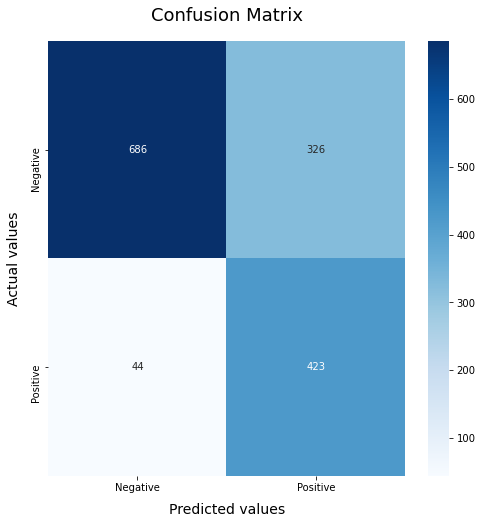

AUC 0.7522395157013004


In [117]:
# BernoullNB
bnb_model = BernoulliNB(alpha = 2)
bnb_model.fit(train_df_standard, y_train)

evaluate_model(bnb_model)

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       856
           1       0.72      0.87      0.79       623

    accuracy                           0.81      1479
   macro avg       0.81      0.82      0.81      1479
weighted avg       0.82      0.81      0.81      1479

**************************************************
Accuracy Score : 0.8066260987153482
**************************************************


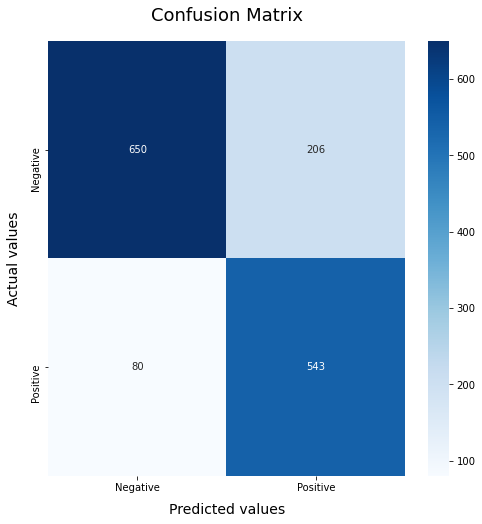

AUC 0.8076887905334967


In [118]:
# Multinomial NB
mnb_model = MultinomialNB(alpha = 2, fit_prior = False)
mnb_model.fit(train_df_standard, y_train)

evaluate_model(mnb_model)

              precision    recall  f1-score   support

           0       0.80      0.75      0.78       779
           1       0.74      0.79      0.77       700

    accuracy                           0.77      1479
   macro avg       0.77      0.77      0.77      1479
weighted avg       0.77      0.77      0.77      1479

**************************************************
Accuracy Score : 0.77079107505071
**************************************************


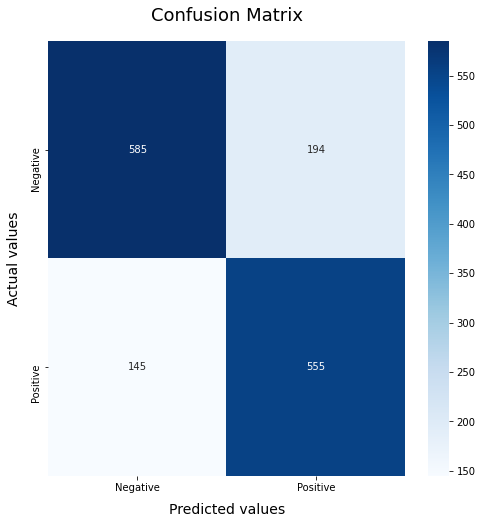

AUC 0.7711789234961683


In [119]:
# Linear SVC
SVC_model = LinearSVC()
SVC_model.fit(train_df_standard, y_train)

evaluate_model(SVC_model)

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       821
           1       0.75      0.85      0.79       658

    accuracy                           0.80      1479
   macro avg       0.81      0.81      0.80      1479
weighted avg       0.81      0.80      0.81      1479

**************************************************
Accuracy Score : 0.8045977011494253
**************************************************


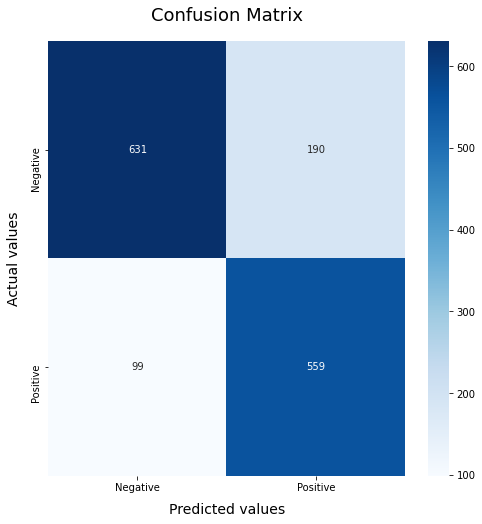

AUC 0.8053559997805293


In [120]:
# Logistic Regression
LR_model = LogisticRegression(C = 0.3, max_iter = 1000, n_jobs=-1)
LR_model.fit(train_df_standard, y_train)

evaluate_model(LR_model)

              precision    recall  f1-score   support

           0       0.91      0.73      0.81       917
           1       0.66      0.89      0.76       562

    accuracy                           0.79      1479
   macro avg       0.79      0.81      0.78      1479
weighted avg       0.82      0.79      0.79      1479

**************************************************
Accuracy Score : 0.7870182555780934
**************************************************


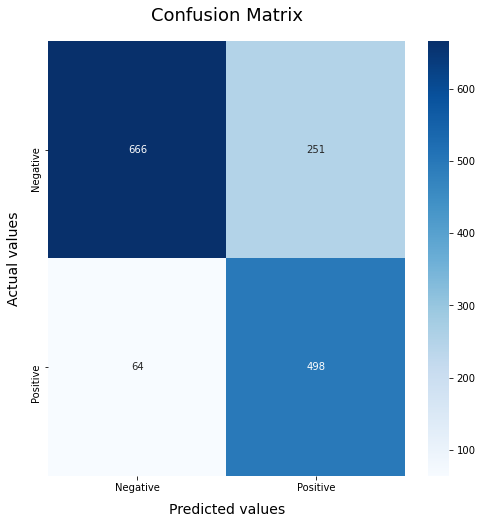

AUC 0.7886076412385463


In [121]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(max_depth = 12, n_estimators=1000, random_state=42)
rf.fit(train_df_standard,y_train)

evaluate_model(rf)

## Model I - Random Forest
### Hyper-parameter tuning for the Random Forest

In [122]:
rf = RandomForestClassifier(random_state = 42, n_jobs = -1)

In [125]:
params = {'criterion': ['gini', 'entropy'],
                   'max_depth': [5, 10, 20, 25,   30],
                   'max_features': ['sqrt', 'log2'],
                   'min_samples_leaf': [2, 3, 4],
                   'min_samples_split': [  3, 5, 6],
                   'n_estimators': [  100, 200]}
      

In [442]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid = params,
                           cv = 4,
                           n_jobs = -1, 
                           verbose = 1, 
                           scoring = "roc_auc")

In [443]:
%%time
grid_search.fit(train_df_standard, y_train )

Fitting 4 folds for each of 360 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 39.4min finished


Wall time: 39min 36s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 25, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [3, 5, 6],
                         'n_estimators': [100, 200]},
             scoring='roc_auc', verbose=1)

In [444]:
from sklearn import metrics
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [445]:
grid_search.best_score_

0.8700423870094897

In [446]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(criterion='entropy', max_depth=30, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=200, n_jobs=-1, random_state=42)

### Random Forest Interpretable Model

In [123]:
rf_model = RandomForestClassifier( criterion='entropy', max_depth=30, max_features='sqrt',
                                   min_samples_leaf=2,   min_samples_split=3 , n_estimators=200, n_jobs=-1,
                                   random_state=42)

In [124]:
rf_model_1 = rf_model.fit(train_df_standard, y_train)
rf_model_1

RandomForestClassifier(criterion='entropy', max_depth=30, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=200, n_jobs=-1, random_state=42)

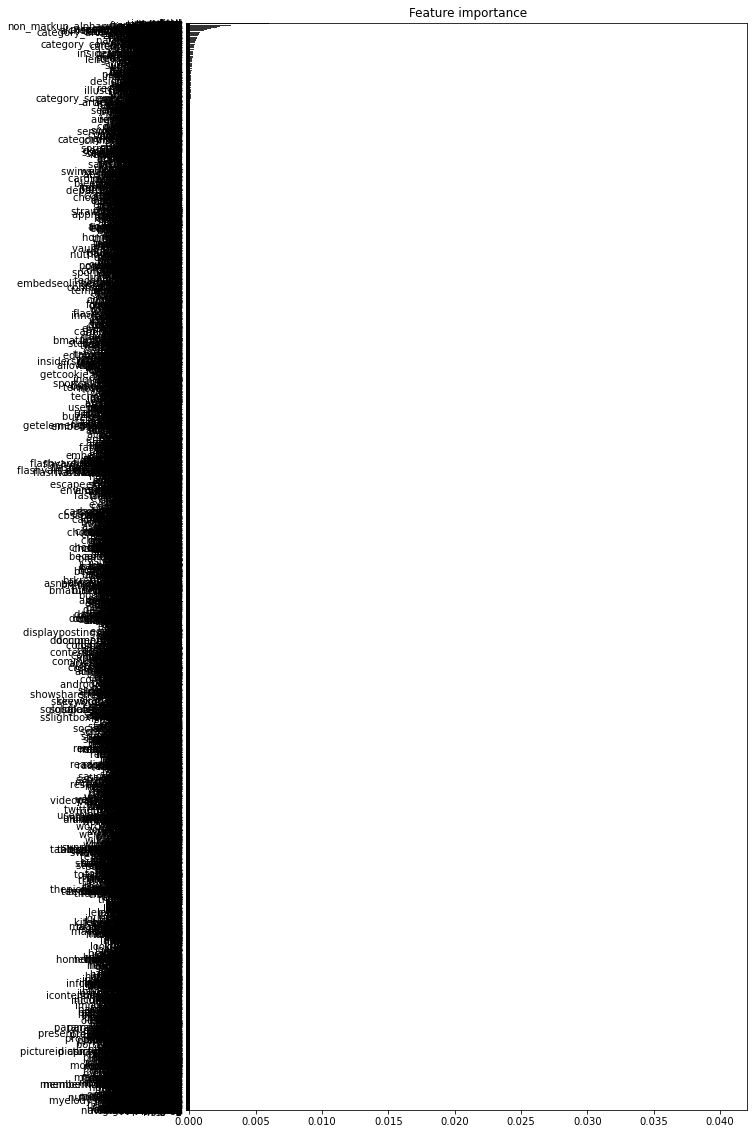

In [164]:
# Feature Importance

imp = pd.Series(data = rf_model_1.feature_importances_, index = train_df_standard.columns).sort_values(ascending = False)
plt.figure(figsize = (10,20))
plt.title("Feature importance")
ax = sns.barplot(y = imp.index, x = imp.values, palette="Blues_d", orient='h')
plt.show()

In [125]:
# Selecting Important Features based on feature importance
imp_params_df = pd.DataFrame({
                                "Varname": train_df_standard.columns,
                                "Imp": rf_model_1.feature_importances_
                            })

In [126]:
imp_params_df.head()

,Varname,Imp
0,alchemy_category_score,0.001666
1,avglinksize,0.002132
2,commonlinkratio_1,0.002517
3,commonlinkratio_3,0.001657
4,compression_ratio,0.002459


In [127]:
# Selecting top 500 Important features
imp_df = imp_params_df.sort_values(by="Imp", ascending=False)[:300]
imp_df[:50]

,Varname,Imp
14247,recipe,0.042344
15176,salt,0.011716
6863,food,0.011193
1164,bake,0.009675
1883,bowl,0.009120
8972,ingredient,0.009065
1205,baking,0.008629
3863,cook,0.008380
3932,cooking,0.008104
11296,minute,0.008067


In [128]:
imp_cols = list(imp_df['Varname'].values)
print(imp_cols)

['recipe', 'salt', 'food', 'bake', 'bowl', 'ingredient', 'baking', 'cook', 'cooking', 'minute', 'tablespoon', 'teaspoon', 'sugar', 'oven', 'make', 'cup', 'mixture', 'flour', 'delicious', 'pepper', 'chocolate', 'preheat', 'stir', 'sweet', 'dish', 'cream', 'butter', 'chopped', 'serve', 'heat', 'combine', 'news', 'large', 'onion', 'frameTagRatio', 'non_markup_alphanum_characters', 'sauce', 'vanilla', 'milk', 'dessert', 'kitchen', 'cheese', 'powder', 'olive', 'egg', 'fresh', 'flavor', 'tomato', 'brown', 'slice', 'sport', 'sprinkle', 'image_ratio', 'linkwordscore', 'technology', 'serving', 'preheat oven', 'easy', 'cake', 'creamy', 'water', 'juice', 'lightly', 'commonlinkratio_1', 'bread', 'fashion', 'smooth', 'compression_ratio', 'quick', 'cooked', 'oven degree', 'pour', 'cool', 'together', 'dough', 'whisk', 'bake minute', 'video', 'healthy', 'garlic', 'chicken', 'inch', 'html_ratio', 'spoon', 'melted', 'avglinksize', 'eating', 'potato', 'salt pepper', 'vegetable', 'numberOfLinks', 'teaspoo

In [129]:
len(imp_cols)

300

In [130]:
# Predicting using train data
y_train_pred = rf_model_1.predict(train_df_standard)

In [131]:
# Predicting using test data
y_test_pred = rf_model_1.predict(test_df_standard)

In [132]:
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import  cross_val_score
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

In [133]:
def evaluate_model_2( Y_DATA, Y_PRED):
    print(" Data Evaluation")
    print()
    confusion = metrics.confusion_matrix(Y_DATA, Y_PRED)
    confusion
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    print("Confusion Matrix of Data")
    print(confusion)
    print()
    class_report = metrics.classification_report(Y_DATA, Y_PRED)
    print("Classification Report of Data" )
    print(class_report)
    print()
    
    # Evaluating Precision and Recall
    precision = precision_score(Y_DATA, Y_PRED)
    print("Precison", precision.round(2))
    print()
    recall = recall_score(Y_DATA, Y_PRED)
    print("Recall", recall.round(2))   
    print()
    F1_score = (2 * ((precision * recall) / (precision + recall)))
    print("F1_Score :" , F1_score.round(2))                           
    print("*"* 50)
    
     

In [134]:
# Evaluating train data

evaluate_model_2(y_train, y_train_pred)

 Data Evaluation

Confusion Matrix of Data
[[2769  100]
 [ 725 2322]]

Classification Report of Data
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      2869
           1       0.96      0.76      0.85      3047

    accuracy                           0.86      5916
   macro avg       0.88      0.86      0.86      5916
weighted avg       0.88      0.86      0.86      5916


Precison 0.96

Recall 0.76

F1_Score : 0.85
**************************************************


In [135]:
# Evaluating test data

evaluate_model_2(y_test, y_test_pred)

 Data Evaluation

Confusion Matrix of Data
[[660  70]
 [227 522]]

Classification Report of Data
              precision    recall  f1-score   support

           0       0.74      0.90      0.82       730
           1       0.88      0.70      0.78       749

    accuracy                           0.80      1479
   macro avg       0.81      0.80      0.80      1479
weighted avg       0.81      0.80      0.80      1479


Precison 0.88

Recall 0.7

F1_Score : 0.78
**************************************************


### Improving Model Performance

In [136]:
rf_final = RandomForestClassifier(random_state = 42, n_jobs = -1)

In [137]:
params_final = { 'max_depth': [30],
                 'min_samples_leaf': [2 ],
                 'min_samples_split': [ 3],
                 'n_estimators': [   200],
                 'max_features' : ["sqrt"],
                 'criterion': ['entropy']
        }

In [138]:
grid_search_final = GridSearchCV(estimator = rf_final,
                           param_grid = params_final,
                           cv = 4,
                           n_jobs = -1, 
                           verbose = 1, 
                           scoring = "roc_auc")

In [139]:
%%time
grid_search_final.fit(train_df_standard[imp_cols], y_train)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.3s finished


Wall time: 6.86 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [30],
                         'max_features': ['sqrt'], 'min_samples_leaf': [2],
                         'min_samples_split': [3], 'n_estimators': [200]},
             scoring='roc_auc', verbose=1)

In [140]:
rf_best_final = grid_search_final.best_estimator_
rf_best_final

RandomForestClassifier(criterion='entropy', max_depth=30, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [141]:
# Prediction using Train data for top 500
y_train_pred = rf_best_final.predict(train_df_standard[imp_cols])

In [142]:
# Predicting Probability
y_train_predicted = rf_best_final.predict_proba(train_df_standard[imp_cols])[:,1]
y_train_predicted[:10]

array([0.14599828, 0.91063095, 0.22803231, 0.22735648, 0.15044467,
       0.45936223, 0.81125443, 0.17108362, 0.8332219 , 0.16458271])

In [143]:
#Creating a dataframe with the actual Converted and the Predicted Converted probabilities
y_train_pred_final = pd.DataFrame({'Actual_Label': y_train, 'Pred_Label':y_train_pred, 'Prob_Label':y_train_predicted})
y_train_pred_final.head()

,Actual_Label,Pred_Label,Prob_Label
4189,0,0,0.145998
5144,1,1,0.910631
3914,0,0,0.228032
3918,0,0,0.227356
2318,0,0,0.150445


In [144]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Prob_Label.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Actual_Label,Pred_Label,Prob_Label,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
4189,0,0,0.145998,1,1,0,0,0,0,0,0,0,0
5144,1,1,0.910631,1,1,1,1,1,1,1,1,1,1
3914,0,0,0.228032,1,1,1,0,0,0,0,0,0,0
3918,0,0,0.227356,1,1,1,0,0,0,0,0,0,0
2318,0,0,0.150445,1,1,0,0,0,0,0,0,0,0


In [145]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Actual_Label, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.515044  1.000000  0.000000
0.1   0.1  0.573191  1.000000  0.119902
0.2   0.2  0.802400  0.999344  0.593238
0.3   0.3  0.922076  0.985231  0.855002
0.4   0.4  0.939655  0.931736  0.948066
0.5   0.5  0.932049  0.874303  0.993377
0.6   0.6  0.903144  0.812274  0.999651
0.7   0.7  0.865112  0.738103  1.000000
0.8   0.8  0.824544  0.659337  1.000000
0.9   0.9  0.754226  0.522809  1.000000


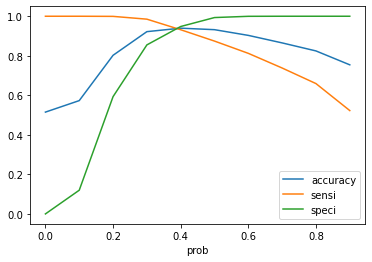

In [146]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [147]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Prob_Label.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Actual_Label,Pred_Label,Prob_Label,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
4189,0,0,0.145998,1,1,0,0,0,0,0,0,0,0,0
5144,1,1,0.910631,1,1,1,1,1,1,1,1,1,1,1
3914,0,0,0.228032,1,1,1,0,0,0,0,0,0,0,0
3918,0,0,0.227356,1,1,1,0,0,0,0,0,0,0,0
2318,0,0,0.150445,1,1,0,0,0,0,0,0,0,0,0


In [148]:
evaluate_model_2(y_train, y_train_pred_final['final_predicted'] )

 Data Evaluation

Confusion Matrix of Data
[[2751  118]
 [ 242 2805]]

Classification Report of Data
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2869
           1       0.96      0.92      0.94      3047

    accuracy                           0.94      5916
   macro avg       0.94      0.94      0.94      5916
weighted avg       0.94      0.94      0.94      5916


Precison 0.96

Recall 0.92

F1_Score : 0.94
**************************************************


### Making Predictions and Evaluating Test data for top 300

In [149]:
rf_best_final

RandomForestClassifier(criterion='entropy', max_depth=30, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [150]:
# Prediction using Test data for top 50 
y_test_pred = rf_best_final.predict(test_df_standard[imp_cols])

In [151]:
# Predicting Probability
y_test_predicted = rf_best_final.predict_proba(test_df_standard[imp_cols])[:,1]
y_test_predicted[:10]

array([0.75883333, 0.95666667, 0.70498523, 0.88041667, 0.18471675,
       0.26776483, 0.90354167, 0.62538115, 0.19864774, 0.53266713])

In [152]:
#Creating a dataframe with the actual Converted and the Predicted Converted probabilities
y_test_pred_final = pd.DataFrame({'Actual_Label': y_test, 'Pred_Label':y_test_pred, 'Prob_Label':y_test_predicted})
y_test_pred_final.head()

,Actual_Label,Pred_Label,Prob_Label
2759,1,1,0.758833
2846,1,1,0.956667
6681,1,1,0.704985
3262,1,1,0.880417
486,0,0,0.184717


In [153]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Prob_Label.map( lambda x: 1 if x > 0.42 else 0)

y_test_pred_final.head()

,Actual_Label,Pred_Label,Prob_Label,final_predicted
2759,1,1,0.758833,1
2846,1,1,0.956667,1
6681,1,1,0.704985,1
3262,1,1,0.880417,1
486,0,0,0.184717,0


In [154]:
evaluate_model_2(y_test, y_test_pred_final['final_predicted'])

 Data Evaluation

Confusion Matrix of Data
[[603 127]
 [143 606]]

Classification Report of Data
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       730
           1       0.83      0.81      0.82       749

    accuracy                           0.82      1479
   macro avg       0.82      0.82      0.82      1479
weighted avg       0.82      0.82      0.82      1479


Precison 0.83

Recall 0.81

F1_Score : 0.82
**************************************************


In [155]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [156]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_test_pred_final['Prob_Label'], drop_intermediate = False )


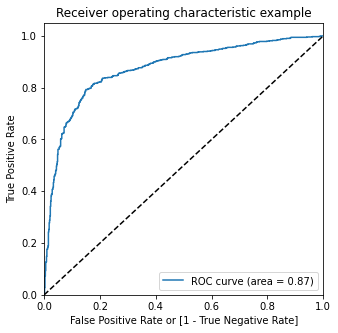

In [157]:
draw_roc(y_test, y_test_pred_final['Prob_Label'])

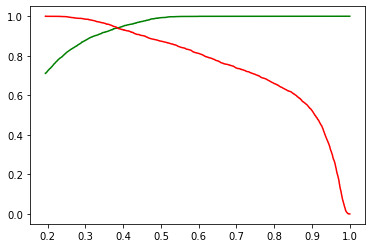

In [158]:
### Precision and recall tradeoff

from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Actual_Label, y_train_pred_final.Prob_Label)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [159]:
# Evaluating Precision and Recall
precision = precision_score(y_test, y_test_pred_final['final_predicted'])
print("Precison", precision.round(4)*100)
print()
recall = recall_score(y_test, y_test_pred_final['final_predicted'])
print("Recall", recall.round(2)*100)  
print()
F1_score = (2 * ((precision * recall) / (precision + recall)))
print("F1_Score :" , F1_score.round(2))                           
AUC = round(metrics.roc_auc_score(y_test, y_test_pred_final['Prob_Label']),2)
print("AUC :", AUC)

Precison 82.67

Recall 81.0

F1_Score : 0.82
AUC : 0.87


In [160]:
results_df = pd.DataFrame(data = { 'Model Name' : 'Interpretable Random Forest', 
                                   'Test Recall' : [recall.round(4)], 
                                   'Test Precision' : [precision.round(4)],
                                   'Test F1 Score' : [F1_score.round(4)],
                                   'AUC' : [AUC], 
                                   'Cut off Prob' : [0.42]}, 
                                   index = ['Model I'],
                                    )
results_df

,Model Name,Test Recall,Test Precision,Test F1 Score,AUC,Cut off Prob
Model I,Interpretable Random Forest,0.8091,0.8267,0.8178,0.87,0.42


### Training using the whole train dataset

In [161]:
X.head()

,urlid,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_3,compression_ratio,frameTagRatio,html_ratio,image_ratio,lengthyLinkDomain,...,category_computer_internet,category_culture_politics,category_gaming,category_health,category_law_crime,category_recreation,category_religion,category_science_technology,category_sports,category_weather
0,4042,0.789131,2.055556,0.676471,0.047059,0.443783,0.090774,0.245831,0.003883,1,...,0,0,0,0,0,0,0,0,0,0
1,8471,0.574147,3.677966,0.508021,0.213904,0.468649,0.098707,0.203490,0.088652,1,...,0,0,0,0,0,1,0,0,0,0
2,1164,0.996526,2.382883,0.562016,0.120155,0.525448,0.072448,0.226402,0.120536,1,...,0,0,0,1,0,0,0,0,0,0
3,6684,0.801248,1.543103,0.400000,0.016667,0.480725,0.095861,0.265656,0.035343,0,...,0,0,0,1,0,0,0,0,0,0
4,9006,0.719157,2.676471,0.500000,0.123457,0.446143,0.024908,0.228887,0.050473,1,...,0,0,0,0,0,0,0,0,1,0


In [162]:
X.shape

(7395, 29)

In [163]:
# Creating separate dataframe according to values

train_data_1  = X[['urlid', 'boilerplate_text']].copy()

train_data_2  = X[['urlid', 'category_arts_entertainment', 'category_business',
       'category_computer_internet', 'category_culture_politics',
       'category_gaming', 'category_health', 'category_law_crime',
       'category_recreation', 'category_religion',
       'category_science_technology', 'category_sports', 'category_weather']].copy()

train_data_3 = X[['urlid', 'alchemy_category_score', 'avglinksize', 'commonlinkratio_1',
       'commonlinkratio_3', 'compression_ratio', 'frameTagRatio', 'html_ratio',
       'image_ratio', 'lengthyLinkDomain', 'linkwordscore',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio',  ]].copy()

In [164]:
train_data_1.shape, train_data_2.shape, train_data_3.shape

((7395, 2), (7395, 13), (7395, 16))

In [165]:
# Transforming using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_2 = TfidfVectorizer(ngram_range = (1,2), max_features = 20000)
tfidf_2.fit(train_data_1.iloc[:, 1])
train_data_1_tfidf = tfidf_2.transform(train_data_1.iloc[:, 1])

In [166]:
train_data_1_tfidf = pd.DataFrame(train_data_1_tfidf.toarray(), columns = tfidf_2.get_feature_names(), index = train_data_3.index )
train_data_1_tfidf.head()

,aaron,aaron rodgers,abandon,abandoned,abandoned theater,abbey,abbey road,abby,abcnews,abdomen,...,zojirushi,zombie,zombie apocalypse,zone,zoom,zucchini,zucchini bread,zucchini stick,zuckerberg,zuhair
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.013342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
# Scaling the data

from sklearn.preprocessing import MinMaxScaler
scaler_2 = MinMaxScaler()


In [168]:
train_data_3.iloc[:, 1:] = scaler_2.fit_transform(train_data_3.iloc[:, 1:].values)
train_data_3.head()

,urlid,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_3,compression_ratio,frameTagRatio,html_ratio,image_ratio,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
0,4042,0.789584,0.005663,0.676471,0.048000,0.021133,0.204241,0.298319,0.008780,1.0,0.24,0.026083,0.033827,0.363636,0.152941,0.079130
1,8471,0.574477,0.010132,0.508021,0.218182,0.022317,0.222092,0.235246,0.009522,1.0,0.40,0.023914,0.037230,0.409091,0.181818,0.125448
2,1164,0.997098,0.006564,0.562016,0.122558,0.025021,0.163008,0.269377,0.009801,1.0,0.55,0.010772,0.051441,0.500000,0.166667,0.057613
3,6684,0.801708,0.004251,0.400000,0.017000,0.022892,0.215686,0.327849,0.009055,0.0,0.24,0.013162,0.023819,0.227273,0.041667,0.100858
4,9006,0.719570,0.007373,0.500000,0.125926,0.021245,0.056044,0.273079,0.009188,1.0,0.14,0.057860,0.032226,0.454545,0.098765,0.082569


In [169]:
# Concatenating the dataframes

frames_2 = [train_data_3.iloc[:, 1:], train_data_2.iloc[:, 1:], train_data_1_tfidf]
train_final = pd.concat(frames_2, axis = 1)
train_final.head()

,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_3,compression_ratio,frameTagRatio,html_ratio,image_ratio,lengthyLinkDomain,linkwordscore,...,zojirushi,zombie,zombie apocalypse,zone,zoom,zucchini,zucchini bread,zucchini stick,zuckerberg,zuhair
0,0.789584,0.005663,0.676471,0.048000,0.021133,0.204241,0.298319,0.008780,1.0,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.574477,0.010132,0.508021,0.218182,0.022317,0.222092,0.235246,0.009522,1.0,0.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.997098,0.006564,0.562016,0.122558,0.025021,0.163008,0.269377,0.009801,1.0,0.55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.801708,0.004251,0.400000,0.017000,0.022892,0.215686,0.327849,0.009055,0.0,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.719570,0.007373,0.500000,0.125926,0.021245,0.056044,0.273079,0.009188,1.0,0.14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [170]:
train_final.shape

(7395, 20027)

In [171]:
test_data.head()

,urlid,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_3,compression_ratio,frameTagRatio,html_ratio,image_ratio,lengthyLinkDomain,...,category_computer_internet,category_culture_politics,category_gaming,category_health,category_law_crime,category_recreation,category_religion,category_science_technology,category_sports,category_weather
0,5865,0.443906,2.558140,0.389706,0.044118,0.489572,0.067143,0.230285,0.199438,1,...,0,0,0,0,0,1,0,0,0,0
1,782,0.135844,3.771429,0.461538,0.051282,0.782051,0.042857,0.365962,0.080000,1,...,0,1,0,0,0,0,0,0,0,0
2,6962,0.000000,2.269565,0.495726,0.170940,1.250000,0.058824,0.161901,10.000000,1,...,0,0,0,0,0,0,0,0,0,0
3,7640,0.902590,2.523490,0.705502,0.122977,0.449366,0.058081,0.146593,0.005964,1,...,0,1,0,0,0,0,0,0,0,0
4,3589,0.486363,1.848000,0.470968,0.032258,0.453757,0.093023,0.244141,0.035714,0,...,0,0,0,0,0,0,0,1,0,0


In [172]:
test_data.shape

(3171, 29)

In [173]:
# Creating separate dataframe for testing

test_data_1  = test_data[['urlid', 'boilerplate_text']].copy()

test_data_2  = test_data[['urlid', 'category_arts_entertainment', 'category_business',
       'category_computer_internet', 'category_culture_politics',
       'category_gaming', 'category_health', 'category_law_crime',
       'category_recreation', 'category_religion',
       'category_science_technology', 'category_sports', 'category_weather']].copy()

test_data_3 = test_data[['urlid', 'alchemy_category_score', 'avglinksize', 'commonlinkratio_1',
       'commonlinkratio_3', 'compression_ratio', 'frameTagRatio', 'html_ratio',
       'image_ratio', 'lengthyLinkDomain', 'linkwordscore',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio',  ]].copy()

In [174]:
test_data_1.shape, test_data_2.shape, test_data_3.shape

((3171, 2), (3171, 13), (3171, 16))

In [175]:
# Transforming using TF-IDF

test_data_1_tfidf = tfidf_2.transform(test_data_1.iloc[:, 1])

In [176]:
test_data_1_tfidf = pd.DataFrame(test_data_1_tfidf.toarray(), columns = tfidf_2.get_feature_names(), index = test_data_3.index )
test_data_1_tfidf.head()

,aaron,aaron rodgers,abandon,abandoned,abandoned theater,abbey,abbey road,abby,abcnews,abdomen,...,zojirushi,zombie,zombie apocalypse,zone,zoom,zucchini,zucchini bread,zucchini stick,zuckerberg,zuhair
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [177]:
# Scaling the data


test_data_3.iloc[:, 1:] = scaler_2.transform(test_data_3.iloc[:, 1:].values)
test_data_3.head()

,urlid,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_3,compression_ratio,frameTagRatio,html_ratio,image_ratio,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
0,5865,0.444161,0.007047,0.389706,0.045000,0.023313,0.151071,0.275161,0.010491,1.0,0.15,0.027136,0.027022,0.136364,0.242647,0.080597
1,782,0.135922,0.010390,0.461538,0.052308,0.037241,0.096429,0.477266,0.009446,1.0,0.62,0.001837,0.007606,0.090909,0.128205,0.176471
2,6962,0.000000,0.006252,0.495726,0.174359,0.059524,0.132353,0.173295,0.096210,1.0,0.42,0.011637,0.023219,0.045455,0.581197,0.125000
3,7640,0.903108,0.006952,0.705502,0.125437,0.021398,0.130682,0.150494,0.008799,1.0,0.41,0.026732,0.061649,0.454545,0.038835,0.063126
4,3589,0.486642,0.005091,0.470968,0.032903,0.021607,0.209302,0.295802,0.009059,0.0,0.34,0.010623,0.030825,0.454545,0.096774,0.065341


In [178]:
# Concatenating the dataframes

test_frames_2 = [test_data_3.iloc[:, 1:], test_data_2.iloc[:, 1:], test_data_1_tfidf]
test_final = pd.concat(test_frames_2, axis = 1)
test_final.head()

,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_3,compression_ratio,frameTagRatio,html_ratio,image_ratio,lengthyLinkDomain,linkwordscore,...,zojirushi,zombie,zombie apocalypse,zone,zoom,zucchini,zucchini bread,zucchini stick,zuckerberg,zuhair
0,0.444161,0.007047,0.389706,0.045000,0.023313,0.151071,0.275161,0.010491,1.0,0.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.135922,0.010390,0.461538,0.052308,0.037241,0.096429,0.477266,0.009446,1.0,0.62,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.006252,0.495726,0.174359,0.059524,0.132353,0.173295,0.096210,1.0,0.42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.903108,0.006952,0.705502,0.125437,0.021398,0.130682,0.150494,0.008799,1.0,0.41,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.486642,0.005091,0.470968,0.032903,0.021607,0.209302,0.295802,0.009059,0.0,0.34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Random Forest Classifier

In [179]:
rf_model_last = RandomForestClassifier( criterion='entropy', max_depth=30, max_features='sqrt',
                                   min_samples_leaf=2, min_samples_split=3, n_estimators=200, n_jobs=-1,
                                   random_state=42)

In [180]:
train_final[imp_cols].shape, y.shape

((7395, 300), (7395,))

In [181]:
rf_model_last_2 = rf_model_last.fit(train_final[imp_cols], y)
rf_model_last_2

RandomForestClassifier(criterion='entropy', max_depth=30, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=200, n_jobs=-1, random_state=42)

### Applying RF on test data

In [182]:
# Prediction using Test data for top 196
y_test_pred_RF_final = rf_model_last_2.predict(test_final[imp_cols])

In [183]:
# Predicting Probability
y_test_pred_prob_RF_final = rf_model_last_2.predict_proba(test_final[imp_cols])[:,1]
y_test_pred_prob_RF_final[:10]

array([0.85207143, 0.23603174, 0.21324891, 0.11019954, 0.52932179,
       0.54980009, 0.38555245, 0.952     , 0.11664412, 0.31395292])

In [184]:
test_data.head()

,urlid,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_3,compression_ratio,frameTagRatio,html_ratio,image_ratio,lengthyLinkDomain,...,category_computer_internet,category_culture_politics,category_gaming,category_health,category_law_crime,category_recreation,category_religion,category_science_technology,category_sports,category_weather
0,5865,0.443906,2.558140,0.389706,0.044118,0.489572,0.067143,0.230285,0.199438,1,...,0,0,0,0,0,1,0,0,0,0
1,782,0.135844,3.771429,0.461538,0.051282,0.782051,0.042857,0.365962,0.080000,1,...,0,1,0,0,0,0,0,0,0,0
2,6962,0.000000,2.269565,0.495726,0.170940,1.250000,0.058824,0.161901,10.000000,1,...,0,0,0,0,0,0,0,0,0,0
3,7640,0.902590,2.523490,0.705502,0.122977,0.449366,0.058081,0.146593,0.005964,1,...,0,1,0,0,0,0,0,0,0,0
4,3589,0.486363,1.848000,0.470968,0.032258,0.453757,0.093023,0.244141,0.035714,0,...,0,0,0,0,0,0,0,1,0,0


In [185]:
#Creating a dataframe with the actual Converted and the Predicted Converted probabilities
y_test_pred_RF = pd.DataFrame({ 'urlid' : test_data['urlid'], 'Pred_Label':y_test_pred_RF_final, 'Prob_Label':y_test_pred_prob_RF_final})
y_test_pred_RF.head()

,urlid,Pred_Label,Prob_Label
0,5865,1,0.852071
1,782,0,0.236032
2,6962,0,0.213249
3,7640,0,0.110200
4,3589,1,0.529322


In [191]:
y_test_pred_RF['label'] = y_test_pred_RF.Prob_Label.map( lambda x: 1 if x > 0.40 else 0)

y_test_pred_RF.head()

,urlid,Pred_Label,Prob_Label,label
0,5865,1,0.852071,1
1,782,0,0.236032,0
2,6962,0,0.213249,0
3,7640,0,0.110200,0
4,3589,1,0.529322,1


In [192]:
len(y_test_pred_RF[y_test_pred_RF['Pred_Label'] == 1])

1358

In [193]:
test_df = y_test_pred_RF[['urlid', 'label']].copy()
test_df.head()

,urlid,label
0,5865,1
1,782,0
2,6962,0
3,7640,0
4,3589,1


In [194]:
test_df.shape

(3171, 2)

In [195]:
test_df.to_csv('Sujit_submission_RF.csv', index = False)

### Getting a score of 0.80599 on Kaggle Website on submission  cut off 0.40

## Model II - PCA Modelling

In [196]:
train_final.shape,y.shape, test_final.shape

((7395, 20027), (7395,), (3171, 20027))

In [197]:
len(imp_cols)

300

In [198]:
imp_cols_pca = imp_cols

In [199]:
from sklearn.decomposition import PCA
pca = PCA(random_state = 42)
pca.fit(train_final[imp_cols_pca])

PCA(random_state=42)

In [200]:
# Components of PCA
pca.components_[:10]

array([[ 3.57117372e-02,  6.38518785e-03,  8.58657171e-03, ...,
         1.19640669e-03,  1.46483343e-03, -1.08864521e-03],
       [-1.41212843e-02,  4.64075829e-04, -3.84609307e-03, ...,
         2.39746292e-03, -1.93151686e-04,  2.95363137e-03],
       [ 7.59534502e-03, -1.01062168e-03, -5.59894525e-03, ...,
        -1.75520038e-03,  2.15108480e-05, -5.33861580e-04],
       ...,
       [ 2.00252292e-02,  1.24757388e-02,  4.44532122e-03, ...,
         2.20579053e-03,  3.56639623e-03, -1.78677602e-03],
       [-4.77766994e-03,  1.41711517e-03, -2.04364536e-02, ...,
         4.97480474e-03,  1.53511470e-03,  2.55449909e-03],
       [-1.07379203e-02, -8.91686176e-03, -7.86669052e-03, ...,
         8.04322884e-05, -3.22805088e-03,  2.25909707e-03]])

In [201]:
# Explained Variance Ratio
evr = pca.explained_variance_ratio_
evr[:10]

array([0.18436934, 0.17498102, 0.10385092, 0.08229579, 0.06534987,
       0.05598617, 0.04430656, 0.03958341, 0.03359487, 0.02451306])

In [202]:
var_cum = np.cumsum(evr)
var_cum[:10]

array([0.18436934, 0.35935036, 0.46320128, 0.54549708, 0.61084695,
       0.66683312, 0.71113968, 0.75072309, 0.78431796, 0.80883102])

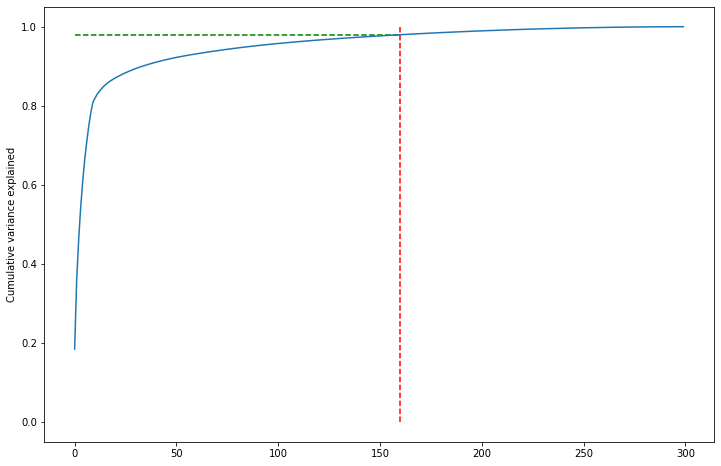

In [205]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=160, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.98, xmax=160, xmin=0, colors="g", linestyles="--")
plt.plot(var_cum)
plt.ylabel("Cumulative variance explained")
plt.show()

### 98% Variance is explained by 160 variables

In [206]:
from sklearn.decomposition import IncrementalPCA

In [207]:
pca_final = IncrementalPCA(n_components = 160)
pca_final

IncrementalPCA(n_components=160)

In [208]:
# Transforming Train Data
df_train_pca = pca_final.fit_transform(train_final[imp_cols_pca])
df_train_pca.shape

(7395, 160)

In [209]:
corr_matrix = np.corrcoef(df_train_pca.T)
corr_matrix[:1]

array([[ 1.00000000e+00,  5.85785839e-10,  5.04208343e-09,
        -7.61985808e-09, -8.86645440e-10,  1.05606953e-08,
        -2.36417062e-09,  4.59728999e-09,  1.45260522e-08,
        -1.54782045e-08, -3.77494310e-08, -1.00466054e-08,
        -2.13987739e-10,  7.04681992e-08,  1.13896489e-08,
        -4.39544590e-08,  8.52124658e-08, -9.33566662e-08,
        -8.13058845e-08, -1.32147503e-07,  1.57760806e-08,
        -3.14343055e-08, -3.99522057e-08, -9.00046109e-08,
        -3.15765657e-07, -2.71730005e-08,  1.62680415e-07,
        -4.52458155e-08,  4.38144348e-07,  1.60230975e-07,
        -1.37364013e-07,  2.30522445e-07,  2.43249555e-07,
         5.53010499e-07,  6.62999615e-09,  2.40939813e-09,
        -8.08270808e-08, -3.14436007e-08, -1.91611526e-07,
        -5.43507682e-08,  4.08814930e-07, -5.30608704e-08,
         6.28137020e-08, -3.65760346e-07, -8.14748981e-08,
         3.16269862e-07,  8.56609616e-07, -3.69015727e-07,
        -5.92137240e-07, -3.16333132e-07, -6.71212347e-0

In [210]:
corr_matrix.shape

(160, 160)

In [211]:
# Transforming Test Data
df_test_pca = pca_final.transform(test_final[imp_cols_pca])
df_test_pca.shape

(3171, 160)

## Model II - Building Logistic Regression

In [212]:
# Creating Column Names
new = ['X'+ str(i) for i in range(1, 161)]
print(new)

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X121', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X1

In [213]:
# Train DataFrame
df_train_pca = pd.DataFrame(df_train_pca, columns = new)
df_train_pca.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160
0,0.022520,0.213706,-0.322285,0.094890,0.105964,-0.106295,-0.170538,0.100812,-0.147059,0.089911,...,-0.000130,0.012190,0.006688,-0.018367,-0.018049,0.016033,-0.016909,-0.012594,0.017521,0.007116
1,0.838244,-0.094281,0.130740,0.046356,0.132259,0.038210,0.030702,-0.047066,0.006120,0.196575,...,-0.011677,-0.002082,-0.005953,0.016068,0.016542,0.002216,-0.015206,0.004812,-0.006160,0.001697
2,0.088536,0.343193,-0.386693,0.262541,0.201321,-0.108792,-0.003171,0.038164,-0.332520,0.224127,...,0.000143,-0.003851,0.010695,-0.000125,0.007993,-0.003516,-0.005922,0.001114,0.001372,0.002108
3,0.023398,0.217700,-0.289625,0.073797,-0.119005,-0.112511,-0.115739,-0.056078,-0.249432,-0.029456,...,-0.026304,0.018896,-0.009227,0.008910,-0.010238,0.021713,-0.008239,0.041186,-0.002425,-0.019381
4,-0.013257,0.239902,-0.636409,0.244926,-0.224569,0.659080,-0.119038,0.023311,0.306253,0.152208,...,0.001719,0.006884,-0.000244,-0.004703,-0.005952,0.003465,-0.011078,-0.003525,0.003947,-0.000995


In [214]:
# Test DataFrame
df_test_pca = pd.DataFrame(df_test_pca, columns = new)
df_test_pca.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160
0,0.805941,-0.179171,0.202612,-0.138519,-0.134916,0.017683,0.011847,0.038808,0.072814,-0.043099,...,-0.049143,-0.040961,0.016856,-0.002023,0.017581,-0.005610,-0.011720,0.016957,0.007298,0.016265
1,-0.226205,-0.248657,-0.009082,-0.053733,0.154659,0.051842,0.213553,-0.176301,-0.157923,-0.113057,...,0.002741,-0.000166,-0.001143,-0.001569,0.000211,0.004603,0.000038,-0.004725,0.001016,0.001846
2,-0.267501,-0.337932,0.055514,-0.191531,0.112571,0.025949,0.347899,0.279914,0.016290,-0.085787,...,-0.000864,0.010449,0.006745,-0.000951,-0.000485,0.004802,0.006911,-0.018130,-0.018325,0.033357
3,0.061455,0.284424,-0.370944,0.203971,0.259663,-0.090788,-0.175362,0.016524,-0.217268,0.144758,...,-0.006329,0.000147,-0.013191,0.001595,0.002958,-0.011324,-0.000345,-0.003642,0.004048,0.003837
4,-0.086195,0.013167,-0.194205,-0.010695,0.036740,-0.049063,-0.068026,-0.074152,-0.157774,0.212766,...,0.023784,-0.007358,0.012463,0.012375,0.013389,-0.000346,-0.011216,0.009950,-0.011491,-0.004646


In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold

model = LogisticRegression(random_state=42)

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty = penalty,C = c_values)
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 42)
grid_search = GridSearchCV(estimator = model, 
                           param_grid = grid,
                           n_jobs = -1, 
                           cv = cv, 
                           scoring = 'roc_auc',
                           error_score = 0, 
                           verbose = 1)

In [216]:
%%time
grid_result = grid_search.fit(df_train_pca, y )

Fitting 30 folds for each of 45 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 291 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 1236 tasks      | elapsed:   47.3s


Wall time: 49.3 s


[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:   49.0s finished


In [217]:
grid_result.best_score_

0.8696909407538698

In [218]:
best_pca_logreg = grid_result.best_params_
best_pca_logreg

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [219]:
best_pca_logreg['C'], best_pca_logreg['penalty'],  best_pca_logreg['solver']

(1.0, 'l1', 'liblinear')

### Tuning model to find optimal cut off for better performance

In [220]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C = best_pca_logreg['C'], 
                            penalty = best_pca_logreg['penalty'], 
                            solver= best_pca_logreg['solver'])

In [221]:
pca_logreg_model = logreg.fit(df_train_pca, y )

In [222]:
pca_logreg_model

LogisticRegression(penalty='l1', solver='liblinear')

In [223]:
df_train_pca.shape

(7395, 160)

In [224]:
# Getting the predicted values on the train set

y_train_pred = pca_logreg_model.predict_proba(df_train_pca)[:, 1]
y_train_pred[:10]

array([0.08392395, 0.17677536, 0.55302724, 0.4308827 , 0.20836682,
       0.46149594, 0.22469653, 0.45455689, 0.29677201, 0.92740556])

In [225]:
#Creating a dataframe with the actual Converted and the Predicted Converted probabilities
y_train_pred_final_pca = pd.DataFrame({ 'Actual_Label': y , 'Pred_Label':y_train_pred})
y_train_pred_final_pca.head()

,Actual_Label,Pred_Label
0,0,0.083924
1,1,0.176775
2,1,0.553027
3,1,0.430883
4,0,0.208367


In [226]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final_pca['predicted'] = y_train_pred_final_pca.Pred_Label.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final_pca.head()

,Actual_Label,Pred_Label,predicted
0,0,0.083924,0
1,1,0.176775,0
2,1,0.553027,1
3,1,0.430883,0
4,0,0.208367,0


In [227]:
evaluate_model_2(y, y_train_pred_final_pca['predicted'])

 Data Evaluation

Confusion Matrix of Data
[[3173  426]
 [1019 2777]]

Classification Report of Data
              precision    recall  f1-score   support

           0       0.76      0.88      0.81      3599
           1       0.87      0.73      0.79      3796

    accuracy                           0.80      7395
   macro avg       0.81      0.81      0.80      7395
weighted avg       0.81      0.80      0.80      7395


Precison 0.87

Recall 0.73

F1_Score : 0.79
**************************************************


### Improving Pca Model Performance

In [228]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final_pca[i]= y_train_pred_final_pca.Pred_Label.map(lambda x: 1 if x > i else 0)
y_train_pred_final_pca.head()

,Actual_Label,Pred_Label,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.083924,0,1,0,0,0,0,0,0,0,0,0
1,1,0.176775,0,1,1,0,0,0,0,0,0,0,0
2,1,0.553027,1,1,1,1,1,1,1,0,0,0,0
3,1,0.430883,0,1,1,1,1,1,0,0,0,0,0
4,0,0.208367,0,1,1,1,0,0,0,0,0,0,0


In [229]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final_pca.Actual_Label, y_train_pred_final_pca[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.513320  1.000000  0.000000
0.1   0.1  0.553076  0.993151  0.088914
0.2   0.2  0.658283  0.964963  0.334815
0.3   0.3  0.756457  0.893572  0.611837
0.4   0.4  0.805544  0.814542  0.796054
0.5   0.5  0.804598  0.731560  0.881634
0.6   0.6  0.792427  0.674131  0.917199
0.7   0.7  0.772684  0.616175  0.937760
0.8   0.8  0.740365  0.533983  0.958044
0.9   0.9  0.674915  0.389094  0.976382


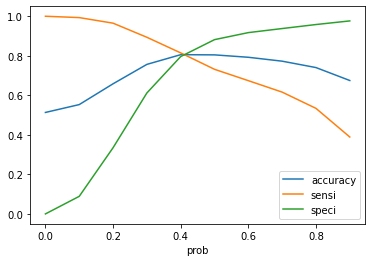

In [230]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [237]:
y_train_pred_final_pca['final_predicted'] = y_train_pred_final_pca.Pred_Label.map( lambda x: 1 if x > 0.41 else 0)

y_train_pred_final_pca.head()

,Actual_Label,Pred_Label,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.083924,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.176775,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.553027,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.430883,0,1,1,1,1,1,0,0,0,0,0,1
4,0,0.208367,0,1,1,1,0,0,0,0,0,0,0,0


In [238]:
evaluate_model_2(y , y_train_pred_final_pca['final_predicted'])

 Data Evaluation

Confusion Matrix of Data
[[2910  689]
 [ 738 3058]]

Classification Report of Data
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      3599
           1       0.82      0.81      0.81      3796

    accuracy                           0.81      7395
   macro avg       0.81      0.81      0.81      7395
weighted avg       0.81      0.81      0.81      7395


Precison 0.82

Recall 0.81

F1_Score : 0.81
**************************************************


In [239]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final_pca.Actual_Label, y_train_pred_final_pca.Pred_Label, drop_intermediate = False )

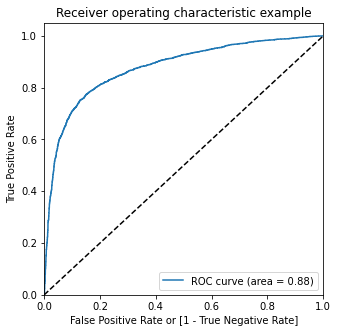

In [240]:
draw_roc(y , y_train_pred_final_pca['Pred_Label'])

### Evaluating Test Data

In [241]:
# Getting the predicted values on the test set

y_test_pred = pca_logreg_model.predict_proba(df_test_pca)[:, 1]
y_test_pred[:10]

array([0.90001769, 0.23739424, 0.34351985, 0.17980222, 0.45505792,
       0.32306846, 0.29577174, 0.99215816, 0.06093033, 0.28867391])

In [242]:
#Creating a dataframe with the actual Converted and the Predicted Converted probabilities
y_test_pred_PCA = pd.DataFrame({ 'urlid' : test_data['urlid'], 'Prob_Label':y_test_pred })
y_test_pred_PCA.head()

,urlid,Prob_Label
0,5865,0.900018
1,782,0.237394
2,6962,0.343520
3,7640,0.179802
4,3589,0.455058


In [243]:
y_test_pred_PCA['label'] = y_test_pred_PCA.Prob_Label.map( lambda x: 1 if x > 0.41 else 0)

y_test_pred_PCA.head()

,urlid,Prob_Label,label
0,5865,0.900018,1
1,782,0.237394,0
2,6962,0.343520,0
3,7640,0.179802,0
4,3589,0.455058,1


In [244]:
len(y_test_pred_PCA[y_test_pred_PCA['label'] == 1])

1533

In [245]:
test_df_pca = y_test_pred_PCA[['urlid', 'label']].copy()
test_df_pca.head()

,urlid,label
0,5865,1
1,782,0
2,6962,0
3,7640,0
4,3589,1


In [246]:
test_df_pca.shape

(3171, 2)

In [249]:
test_df_pca.to_csv('Sujit_submission_PCA_2.csv', index = False)

### Getting a Kaggle Score of 0.80441 at 0.41 cut off

## Model 3 Logistic Regression

In [250]:
train_final.shape,y.shape, test_final.shape

((7395, 20027), (7395,), (3171, 20027))

In [251]:
len(imp_cols_pca)

300

In [252]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold

model = LogisticRegression(random_state=42)

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1', 'l2', 'elasticnet']
c_values = [ 1.0, 0.2, 0.3, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty = penalty,C = c_values)
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 42)
grid_search = GridSearchCV(estimator = model, 
                           param_grid = grid,
                           n_jobs = -1, 
                           cv = cv, 
                           scoring = 'roc_auc',
                           error_score = 0, 
                           verbose = 1)

In [254]:
%%time
grid_result = grid_search.fit(train_final[imp_cols_pca], y )

Fitting 30 folds for each of 45 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 472 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:   48.1s finished


Wall time: 48.6 s


In [255]:
grid_result.best_score_

0.8692098216739816

In [256]:
best_logreg = grid_result.best_params_
best_logreg

{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}

In [257]:
best_logreg['C'], best_logreg['penalty'],  best_logreg['solver']

(1.0, 'l2', 'lbfgs')

In [258]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C = best_logreg['C'], 
                            penalty = best_logreg['penalty'], 
                            solver= best_logreg['solver'])

In [259]:
logreg_model = logreg.fit(train_final[imp_cols_pca], y )
logreg_model

LogisticRegression()

In [260]:
# Getting the predicted values on the train set

y_train_pred = logreg_model.predict_proba(train_final[imp_cols_pca])[:, 1]
y_train_pred[:10]

array([0.12845123, 0.22047537, 0.53773499, 0.45189822, 0.21461855,
       0.48413548, 0.23201452, 0.48344883, 0.35460439, 0.90968868])

In [261]:
#Creating a dataframe with the actual Converted and the Predicted Converted probabilities
y_train_pred_final_logreg = pd.DataFrame({ 'Actual_Label': y , 'Pred_Label': y_train_pred})
y_train_pred_final_logreg.head()

,Actual_Label,Pred_Label
0,0,0.128451
1,1,0.220475
2,1,0.537735
3,1,0.451898
4,0,0.214619


In [262]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final_logreg['predicted'] = y_train_pred_final_logreg.Pred_Label.map(lambda x: 1 if x > 0.43 else 0)

# Let's see the head
y_train_pred_final_logreg.head()

,Actual_Label,Pred_Label,predicted
0,0,0.128451,0
1,1,0.220475,0
2,1,0.537735,1
3,1,0.451898,1
4,0,0.214619,0


In [263]:
evaluate_model_2(y, y_train_pred_final_logreg['predicted'])

 Data Evaluation

Confusion Matrix of Data
[[2935  664]
 [ 740 3056]]

Classification Report of Data
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      3599
           1       0.82      0.81      0.81      3796

    accuracy                           0.81      7395
   macro avg       0.81      0.81      0.81      7395
weighted avg       0.81      0.81      0.81      7395


Precison 0.82

Recall 0.81

F1_Score : 0.81
**************************************************


In [264]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final_logreg[i]= y_train_pred_final_logreg.Pred_Label.map(lambda x: 1 if x > i else 0)
y_train_pred_final_logreg.head()

,Actual_Label,Pred_Label,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.128451,0,1,1,0,0,0,0,0,0,0,0
1,1,0.220475,0,1,1,1,0,0,0,0,0,0,0
2,1,0.537735,1,1,1,1,1,1,1,0,0,0,0
3,1,0.451898,1,1,1,1,1,1,0,0,0,0,0
4,0,0.214619,0,1,1,1,0,0,0,0,0,0,0


In [265]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final_logreg.Actual_Label, y_train_pred_final_logreg[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.513320  1.000000  0.000000
0.1   0.1  0.535903  0.997102  0.049458
0.2   0.2  0.632454  0.971549  0.274799
0.3   0.3  0.740906  0.909642  0.562934
0.4   0.4  0.804733  0.833772  0.774104
0.5   0.5  0.807437  0.736301  0.882467
0.6   0.6  0.789047  0.667018  0.917755
0.7   0.7  0.765112  0.594837  0.944707
0.8   0.8  0.722786  0.493678  0.964435
0.9   0.9  0.634348  0.302950  0.983884


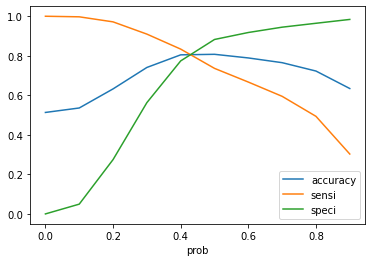

In [266]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [267]:
y_train_pred_final_logreg['final_predicted'] = y_train_pred_final_logreg.Pred_Label.map( lambda x: 1 if x > 0.43  else 0)

y_train_pred_final_logreg.head()

,Actual_Label,Pred_Label,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.128451,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.220475,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.537735,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.451898,1,1,1,1,1,1,0,0,0,0,0,1
4,0,0.214619,0,1,1,1,0,0,0,0,0,0,0,0


In [268]:
evaluate_model_2(y , y_train_pred_final_logreg['final_predicted'])

 Data Evaluation

Confusion Matrix of Data
[[2935  664]
 [ 740 3056]]

Classification Report of Data
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      3599
           1       0.82      0.81      0.81      3796

    accuracy                           0.81      7395
   macro avg       0.81      0.81      0.81      7395
weighted avg       0.81      0.81      0.81      7395


Precison 0.82

Recall 0.81

F1_Score : 0.81
**************************************************


In [269]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final_logreg.Actual_Label, y_train_pred_final_logreg.Pred_Label, drop_intermediate = False )

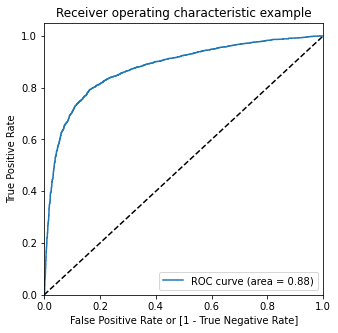

In [270]:
draw_roc(y , y_train_pred_final_logreg['Pred_Label'])

In [271]:
# Getting the predicted values on the test set

y_test_pred = logreg_model.predict_proba(test_final[imp_cols_pca])[:, 1]
y_test_pred[:10]

array([0.85102587, 0.24550384, 0.35628626, 0.22563569, 0.47049417,
       0.36766317, 0.3302535 , 0.9767574 , 0.10302823, 0.30101187])

In [272]:
#Creating a dataframe with the actual Converted and the Predicted Converted probabilities
y_test_pred_final_logreg = pd.DataFrame({ 'urlid' : test_data['urlid'], 'Prob_Label':y_test_pred })
y_test_pred_final_logreg.head()

,urlid,Prob_Label
0,5865,0.851026
1,782,0.245504
2,6962,0.356286
3,7640,0.225636
4,3589,0.470494


In [283]:
y_test_pred_final_logreg['label'] = y_test_pred_final_logreg.Prob_Label.map( lambda x: 1 if x > 0.43 else 0)

y_test_pred_final_logreg.head()

,urlid,Prob_Label,label
0,5865,0.851026,1
1,782,0.245504,0
2,6962,0.356286,0
3,7640,0.225636,0
4,3589,0.470494,1


In [284]:
len(y_test_pred_final_logreg[y_test_pred_final_logreg['label'] == 1])

1527

In [285]:
test_df_logreg = y_test_pred_final_logreg[['urlid', 'label']].copy()
test_df_logreg.head()

,urlid,label
0,5865,1
1,782,0
2,6962,0
3,7640,0
4,3589,1


In [286]:
test_df_logreg.shape

(3171, 2)

In [287]:
test_df_logreg.to_csv('Sujit_submission_LOGREG_2.csv', index = False)

#### Kaggle Submission score AUC = 0.80914 at 0.43 cut off

### Final Inferences

#### Model 1 - Random Forest - Kaggle Score = 0.80599 at 0.40 cut off probability,  
- Class 1 Precision = 0.83, Recall 0.81, F1 Score = 0.82
- Class 0 Precision = 0.81, Recall 0.83, F1 Score = 0.82

#### Model 2 - PCA - Logistic Regression - Kaggle Score = 0.8044 at 0.45 cut off probability with 270 variables

#### Model 3 - Logistic Regression - 300 Variables - Kaggle Score = 0.80914 at 0.43 cut off probability  

- Model can be further improved , the top score in Kaggle is 0.88+ 

#### Best performing model is Logistic regression model built using 300 best features of Random Forest Classifier 

 

Thank you
